# <div style="background-color: lightblue; padding: 8px;">Lending Club Case Study</div>

## Introduction:
- In this case study we will apply `EDA techniques` on a dataset which contains all **loan details** issued through time period 2007 to 2011, to identify the **driving factors** behind **loan default**.

## Business Problem:
When a company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two **types of risks** are associated with the bank’s decision:

- If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company

- If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

## Business Objective:
- Identify the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Contents:
1. [Data Cleaning And Prepration](#Data-Cleaning-And-Prepration)
3. [Feature Engineering](#Feature-Engineering)
2. [Univariate Analysis](#Univariate-Analysis)
3. [Bivariate Analysis](#Bivariate-Analysis)
4. [Segmented Analysis](#Segmented-Analysis)
4. [Multivariate Analysis](#Multivariate-Analysis)


### Importing all the libraries needed for our analysis

In [2]:
#importing Libraries for data manipulation
import pandas as pd #dataframe
import numpy as np #numerical python

#importing Libraries for data visualization
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #plotting
import plotly.express as px #plotting

# Warnings library will be used to ignore some warnings
import warnings #warning

warnings.filterwarnings('ignore')

# <div style="background-color: lightblue; padding: 8px;">Data Cleaning And Prepration</div>


### Load dataset into dataframe and do  basic checks

In [3]:
# Read the input csv file into a dataframe loan_df

loan_df=pd.read_csv('loan.csv')

In [4]:
#Check shape (number of rows and column) of datadrame

print("Shape of dataset is:",loan_df.shape) ## We have 39717 Rows and 111 Columns

Shape of dataset is: (39717, 111)


In [5]:
#Display top 5 rows to have a quick look to the data

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
# See what all columns loan_df has. Simple loan_df.columns was not displaying all column name , so used tolist()

column_names = loan_df.columns.tolist()
print(column_names)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [7]:
# We will see statical summary of numerical variables available in our dataframe
loan_df.describe()
# We have too many columns here, we will check and analyse after cleaning up our dataframe.

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning
- We are going to calculate Percantage of NULL values in each column, and `drop` those columns which have more than `75% NULL` values.

In [8]:
#Calculate % of null value and convert the series into a dataframe with column name "Perc"
col_to_drop = (loan_df.isna().sum() * 100 / len(loan_df)).to_frame(name = "perc")

# Check if theres any column have 100% NULL Value
col_with_all_null = col_to_drop[col_to_drop["perc"]==100]

print('Number of columns having 100% NULL values: ', col_with_all_null.count())
col_with_all_null['perc']

# This is interesting We have 54 columns which have all NULL value.

Number of columns having 100% NULL values:  perc    54
dtype: int64


mths_since_last_major_derog       100.0
annual_inc_joint                  100.0
dti_joint                         100.0
verification_status_joint         100.0
tot_coll_amt                      100.0
tot_cur_bal                       100.0
open_acc_6m                       100.0
open_il_6m                        100.0
open_il_12m                       100.0
open_il_24m                       100.0
mths_since_rcnt_il                100.0
total_bal_il                      100.0
il_util                           100.0
open_rv_12m                       100.0
open_rv_24m                       100.0
max_bal_bc                        100.0
all_util                          100.0
total_rev_hi_lim                  100.0
inq_fi                            100.0
total_cu_tl                       100.0
inq_last_12m                      100.0
acc_open_past_24mths              100.0
avg_cur_bal                       100.0
bc_open_to_buy                    100.0
bc_util                           100.0


- **Observations:**
> 1. We have 54 Columns, having all NULL values

In [9]:
# Now filtering out columns having more than 75% NULL values,and we will be dropping those 
col_to_drop = col_to_drop[col_to_drop["perc"]>75]

#Now Drop those columns
loan_df = loan_df.drop(list(col_to_drop.index), axis = 1)

In [10]:
# Check shape of dataframe now, to see number of rows and columns after dropping columns.
print("Shape of dataset after dropping columns having >75% NULL value is:",loan_df.shape)

# Now checking how many columns has been dropped here, original dataset had 111 columns
print("So Total no of columns dropped is :",(111-55),'out of this 54 had 100% NULL values ')

Shape of dataset after dropping columns having >75% NULL value is: (39717, 55)
So Total no of columns dropped is : 56 out of this 54 had 100% NULL values 


In [11]:
# Drop columns which don't have any signicance in our analysis
col_drop=["desc","mths_since_last_delinq","member_id","url","emp_title","zip_code","tax_liens"]

loan_df.drop(labels=col_drop,axis=1,inplace=True)

- **Now We will check for dupilcate Rows and also find rows which have all NULL value**

In [12]:
# Finding number of rows which have missing values

print('Number of rows having all NULL values :',loan_df.isna().all(axis=1).sum())


Number of rows having all NULL values : 0


In [13]:
# Checking for duplicate rows, using column id 
duplicate_rows=loan_df[loan_df.duplicated(['id'])]
print("Number of duplicate rows : ", duplicate_rows.size)

# We don't have any duplicate records

Number of duplicate rows :  0


In [14]:
# Lets check colum and their defined datatypes
loan_df.info()
#Total 48 columns are present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [15]:
# Now checking Count of missing values in each column, to check which all columns need inputation.
# We have 39717 rows in df loan_df

loan_df.isnull().sum().sort_values(ascending=False)

emp_length                    1075
pub_rec_bankruptcies           697
last_pymnt_d                    71
collections_12_mths_ex_med      56
chargeoff_within_12_mths        56
revol_util                      50
title                           11
last_credit_pull_d               2
policy_code                      0
total_rec_prncp                  0
total_acc                        0
initial_list_status              0
out_prncp                        0
out_prncp_inv                    0
total_pymnt                      0
total_pymnt_inv                  0
total_rec_int                    0
application_type                 0
total_rec_late_fee               0
recoveries                       0
revol_bal                        0
delinq_amnt                      0
last_pymnt_amnt                  0
acc_now_delinq                   0
collection_recovery_fee          0
id                               0
loan_amnt                        0
open_acc                         0
funded_amnt         

**Observations:**
- We have NULL values in emp_length,pub_rec_bankruptcies,collections_12_mths_ex_med,chargeoff_within_12_mths,last_pymnt_d,revol_util,title
- We will analyze and do imputation one by one, to the columns which are important in our analysis

In [16]:
# Checking data distribution in emp_length
loan_df['emp_length'].value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

**Observations:**
- Since We have signicant count of NaN value (1075), Imputing with specific values like "10+ years" or "< 1 year" could introduce bias in our risk assessment. So i Will Impute it with 0 
- Also we will extract only integer part from it which will help us in our further analysis

In [17]:
# Imputing NaN values in emp_length with '0'
loan_df.emp_length.fillna('0',inplace=True)

#Extracting Numeric part
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')

In [18]:
# Now check distribution. 
loan_df['emp_length'].value_counts()
# Now Nan value is replaced with 0 as shown below

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: emp_length, dtype: int64

**Observations:**
- We have successfully imputed NULL with 0 and extracted numeric part from emp_length.
- Here one point to note that we have merged <1 year and 1 year into one vlaue i.s '1' , but it's fine 0-1 year we have put that in one category i.s 1 year

In [19]:
# Now checking data distribution in column 'pub_rec_bankruptcies' (Number of public record bankruptcies)
loan_df['pub_rec_bankruptcies'].value_counts(dropna=False)

0.0    37339
1.0     1674
NaN      697
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

**Observations:**
- We have 697 NaN values.
- We will be imputing NaN with 'Not Known'

In [20]:
print('Before cleaning pub_rec_bankruptcies NaN count is :',loan_df.pub_rec_bankruptcies.isnull().sum())

# Replacing the 'NaN' with 'Not Known' values
loan_df.pub_rec_bankruptcies.fillna('Not Known',inplace=True)

print('After cleaning pub_rec_bankruptcies NaN count is :',loan_df.pub_rec_bankruptcies.isnull().sum())


Before cleaning pub_rec_bankruptcies NaN count is : 697
After cleaning pub_rec_bankruptcies NaN count is : 0


In [21]:
# Now checking data distribution of title,(The loan title provided by the borrower)
# Since we have only 11 NaN out of 3906 records, we will impute NaN with Mode
# We have very high unique count, so we might not be using it in our analysis.
loan_df['title'].describe()

count                  39706
unique                 19615
top       Debt Consolidation
freq                    2184
Name: title, dtype: object

In [22]:
# Since top value in column 'title' is 'Debt Consolidation'
# We will impute NaN with 'Debt Consolidation'
print('Before imputing title has NaN count:',loan_df['title'].isna().sum())

loan_df.title.fillna('Debt Consolidation',inplace=True)

print('After imputing title has NaN count:',loan_df['title'].isna().sum())

Before imputing title has NaN count: 11
After imputing title has NaN count: 0


**Next Action:**
- We will be removing % symbol from int_rate and revol_util and will convert it to integer

In [23]:
# Remove % from 'int_rate'(interest rate) and 'revol_util' (credit utilization) and convert it into integer.
# Converting it to interger will help us in further Bivatiate,segmented/multivariate analysis

loan_df['int_rate']=loan_df['int_rate'].str.rstrip('%').astype(float)

loan_df['revol_util']=loan_df['revol_util'].str.rstrip('%').astype(float)

In [24]:
# Describing the revol_util column and we can see mean and median are ~equal
loan_df['revol_util'].describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [25]:
# From the above reasult , we can see Mean (48,83) is almost same to median (49.3)
# We Will impute NaN values with mean
print('Before imputing, revol_util has NaN count:',loan_df['revol_util'].isna().sum())

loan_df['revol_util'].fillna(loan_df['revol_util'].mean(),inplace=True)

print('After imputing, revol_util has NaN count:',loan_df['revol_util'].isna().sum())

Before imputing, revol_util has NaN count: 50
After imputing, revol_util has NaN count: 0


## Univariate Analysis for outlier treatment :
- Now we will perform `Univariate Analysis` to understand distribution of data for each variables and identify outliers. We will drop the outliers from our analysis.

In [26]:
# Check what all Numerical variables we have 
loan_df.dtypes[loan_df.dtypes !='object']

id                              int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
int_rate                      float64
installment                   float64
annual_inc                    float64
dti                           float64
delinq_2yrs                     int64
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal                       int64
revol_util                    float64
total_acc                       int64
out_prncp                     float64
out_prncp_inv                 float64
total_pymnt                   float64
total_pymnt_inv               float64
total_rec_prncp               float64
total_rec_int                 float64
total_rec_late_fee            float64
recoveries                    float64
collection_recovery_fee       float64
last_pymnt_amnt               float64
collections_12_mths_ex_med    float64
policy_code 

**Next Action:**
- We will use ggplot style to plot boxplot using seaborn to analyze data distribution 
and identify outliers

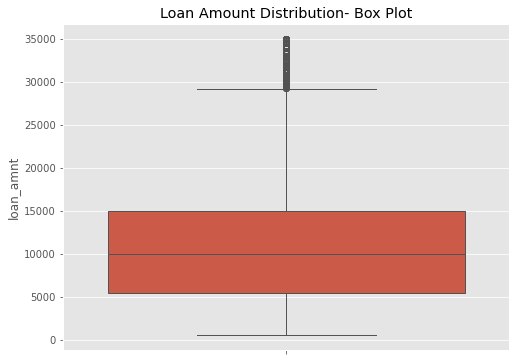

In [27]:
# Box plot of loan_amnt

plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
  ax=sns.boxplot(loan_df.loan_amnt)
  ax.set_title('Loan Amount Distribution- Box Plot')


- We can see , some far datapoints from median, let's closely check datapoints in upper quartiles

In [28]:
# Check quartiles of loan_amnt
quart=loan_df.loan_amnt.quantile([.5,.75,.85,.9,.95,.96,.97,.98,.99])
quart

0.50    10000.0
0.75    15000.0
0.85    20000.0
0.90    22000.0
0.95    25000.0
0.96    25484.0
0.97    30000.0
0.98    31468.0
0.99    35000.0
Name: loan_amnt, dtype: float64

**Observation:** 
- We can see that we do have some extreme data point from median, but the distribution is mostly continous, so won't drop any records here.

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

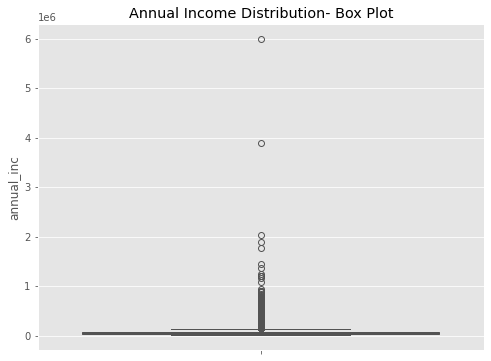

In [29]:
# We will use ggplot style to plot boxplot of the 'loan_amnt' using seaborn
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
  ax=sns.boxplot(loan_df.annual_inc)
  ax.set_title('Annual Income Distribution- Box Plot')

loan_df['annual_inc'].describe()

**Observations**
- This box plot shows we have outliers, as there are datapoints far from mean. We will be removing the outliers

In [30]:
# Check quartiles of 'annual_inc'
quart=loan_df.annual_inc.quantile([.1,.2,.3,.4,.5,.75,.85,.95,1])
quart

0.10      30000.0
0.20      37500.0
0.30      45000.0
0.40      50400.0
0.50      59000.0
0.75      82300.0
0.85     100000.0
0.95     142000.0
1.00    6000000.0
Name: annual_inc, dtype: float64

In [31]:
# We have outliers towards uppet quartile. Take 95 quartile as threshold and drop records above this

print('Number of rows in our dataframe before dropping:',loan_df.shape[0])

loan_df=loan_df[loan_df['annual_inc']<=loan_df['annual_inc'].quantile(.95)]

print('Number of rows dropped here is :',39717-loan_df.shape[0])

Number of rows in our dataframe before dropping: 39717
Number of rows dropped here is : 1974


count     37743.000000
mean      61071.860572
std       27830.995882
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64

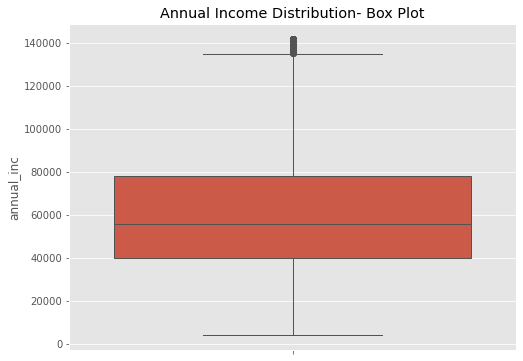

In [32]:
#Now checking the distribution using boxplot
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
  ax=sns.boxplot(loan_df['annual_inc'])
  ax.set_title('Annual Income Distribution- Box Plot')

# Data looks continously distributed now

loan_df['annual_inc'].describe()

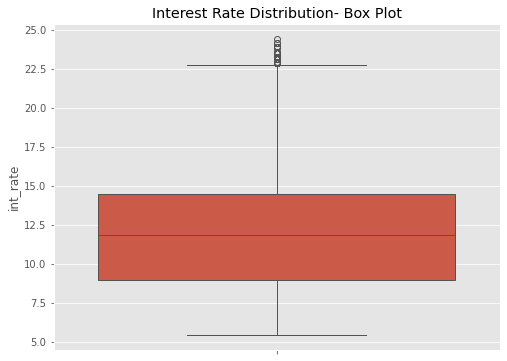

In [33]:
# Box plot of int_rate
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    ax=sns.boxplot(loan_df['int_rate'])
    ax.set_title('Interest Rate Distribution- Box Plot')

In [34]:
loan_df['int_rate'].quantile([.5,.7,.8,.85,.90,.95,1])

0.50    11.83
0.70    13.80
0.80    15.23
0.85    15.99
0.90    16.89
0.95    18.39
1.00    24.40
Name: int_rate, dtype: float64

**Observations:**
- There are some extreme datapoint , but the distribution looks continous so no need of outlier treatment.

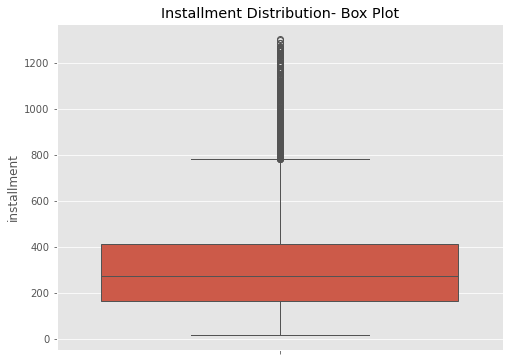

In [35]:
# Box plot for 'installment'
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    ax=sns.boxplot(loan_df['installment'])
    ax.set_title('Installment Distribution- Box Plot')


In [36]:
#Lets closely check the installment quantile
loan_df['installment'].quantile([.5,.6,.7,.8,.85,.9,.95,.96,.97,.98,.99,1])

0.50     273.1000
0.60     323.4400
0.70     377.7260
0.80     466.6700
0.85     512.5200
0.90     591.0120
0.95     709.1800
0.96     766.7684
0.97     809.7500
0.98     848.4200
0.99     901.0100
1.00    1305.1900
Name: installment, dtype: float64

**Observations:**
- From the box plot we see, we have significant outliers here. 
- We will be using IQR rule here for outlier treatment

In [37]:
# Calculate quartiles and IQR
Q1 = loan_df['installment'].quantile(0.25)
Q3 = loan_df['installment'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Check Outlier Records
outliers = loan_df[(loan_df['installment'] < lower_bound) | (loan_df['installment'] > upper_bound)]
print('Total outlier counts is :',outliers.shape)

#We have 1373 records in outlier here

Total outlier counts is : (1373, 48)


In [38]:
# Drop outliers
print('shape before outlier treatment',loan_df.shape)
loan_df=loan_df[(loan_df['installment']>lower_bound) & (loan_df['installment']<upper_bound)]
print('shape after outlier treatment',loan_df.shape)

shape before outlier treatment (37743, 48)
shape after outlier treatment (36370, 48)


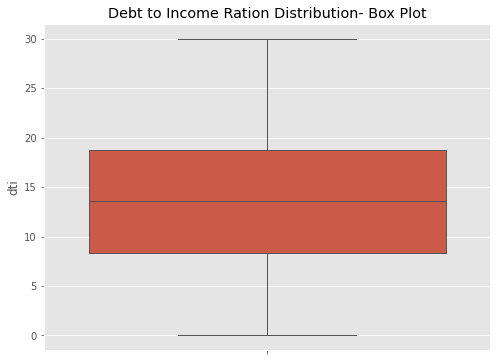

In [39]:
# Box plot of dti (Debt to income Ratio)
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    ax=sns.boxplot(loan_df['dti'])
    ax.set_title('Debt to Income Ration Distribution- Box Plot')

**Observation:**
- No Outliers found in above box plot

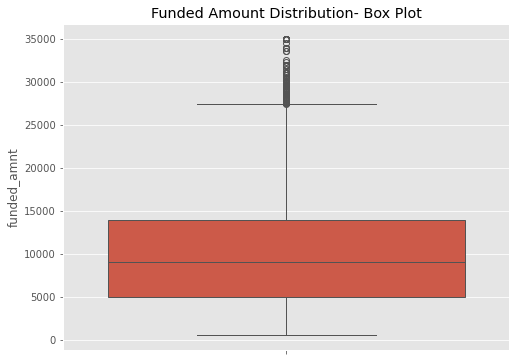

In [40]:
# Box plot of funded_amnt
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    ax=sns.boxplot(loan_df['funded_amnt'])
    ax.set_title('Funded Amount Distribution- Box Plot')

**Observations:**
- We have outliers in funded_amnt
- We Will use IQR rule for outlier treatment

In [41]:
# Calculate quartiles and IQR
Q1 = loan_df['funded_amnt'].quantile(0.25)
Q3 = loan_df['funded_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Check Outlier Records
outliers = loan_df[(loan_df['funded_amnt'] < lower_bound) | (loan_df['funded_amnt'] > upper_bound)]
outliers.shape

#We have 322 records in outlier here

(322, 48)

In [42]:
# Drop outliers
print('shape of dataframe before outlier treatment',loan_df.shape)
loan_df=loan_df[(loan_df['funded_amnt']>lower_bound) & (loan_df['funded_amnt']<upper_bound)]
print('shape of dataframe after outlier treatment',loan_df.shape)

shape of dataframe before outlier treatment (36370, 48)
shape of dataframe after outlier treatment (36048, 48)


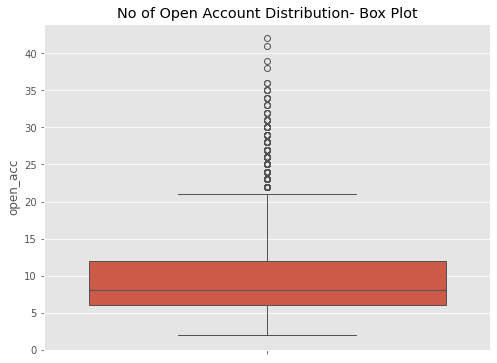

In [43]:
# Boxplot of open_acc
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    ax=sns.boxplot(loan_df['open_acc'])
    ax.set_title('No of Open Account Distribution- Box Plot')

**Observations:**
- We have outliers in open_acc
- We will be using IQR rule for outlier treatment

In [44]:
# Calculate quartiles and IQR
Q1 = loan_df['open_acc'].quantile(0.25)
Q3 = loan_df['open_acc'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Check Outlier Records
outliers = loan_df[(loan_df['open_acc'] < lower_bound) | (loan_df['open_acc'] > upper_bound)]
outliers.shape

#We have 421 records in outlier here

(421, 48)

In [45]:
# Drop outliers
print('shape before outlier treatment',loan_df.shape)
loan_df=loan_df[(loan_df['open_acc']>=lower_bound) & (loan_df['open_acc']<=upper_bound)]
print('shape after outlier treatment',loan_df.shape)

shape before outlier treatment (36048, 48)
shape after outlier treatment (35627, 48)


In [46]:
# Check distince values and it's count in acc_now_deliqn
loan_df['acc_now_delinq'].value_counts()

0    35627
Name: acc_now_delinq, dtype: int64

**Observations:**
- acc_now_delinq means 'number of accounts on which the borrower is now delinquent'.
- We have only one distinct value (0) in acc_now_deliqn
- Since this column lacks variability and does not provide any differentiating information, we will drop it.

In [47]:
#Check distinct values and count in policy_code
loan_df['policy_code'].value_counts()

1    35627
Name: policy_code, dtype: int64

**Observations**
- policy_code has only one distinct value (1)
- Since this column lacks variability and does not provide any differentiating information, we will drop it.


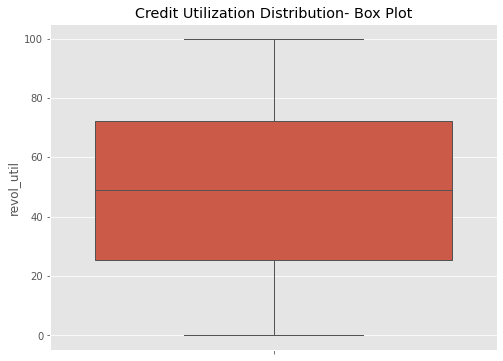

In [48]:
#revol_util
# Boxplot of revol_util
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    ax=sns.boxplot(loan_df['revol_util'])
    ax.set_title('Credit Utilization Distribution- Box Plot')

**Observations:**
> 1. No outliers found in above box plot

## Feature Engineering
- Adding new derived columns from existing columns and at the end dropping all the columns which are used in feature engineering as they will corelated with new derived column

In [49]:
#Creating categories for loan amounts for further bivariate analysis
loan_df['loan_amnt_categories']=pd.cut(loan_df['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000+'])


In [50]:
#Creating categories for annual incomes for further bivariate analysis
loan_df['annual_inc_categories']=pd.cut(loan_df['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20,000','20,000-40,000','40,000-60,000','60,000-80,000','80,000+'])

In [51]:
#Creating categories for interest rates for further bivariate analysis
loan_df['interest_rate_categories']=pd.cut(loan_df['int_rate'],[0,9,18,27],labels=['0-9','9-18','18+'])


In [52]:
#Creating dti into buckets for further bivariate analysis
loan_df['dti_categories']=pd.cut(loan_df['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','20+'])


In [53]:
#Extracting Month and year from 'issue_d' and create two columns Month and Year,
#will use this in univariate and bivariate analysis to see monthly and yearly trend

# Convert 'issue_d' to datetime
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')

# Extract month and year
loan_df['Month'] = loan_df['issue_d'].dt.strftime('%b')  # Extract month abbreviation
loan_df['Year'] = loan_df['issue_d'].dt.year 

In [54]:
# Creating bucket of installment for further bivariate analysis
loan_df['installment_category']=pd.cut(loan_df['installment'],[0,150,300,450,600,750],labels=['0-150','150-300','300-450','450-600','600+'])



In [55]:
# Dropping all Unneccessary columns 
loan_df = loan_df.drop(columns=['id','funded_amnt_inv','sub_grade',
                                  'delinq_2yrs','earliest_cr_line','inq_last_6mths','revol_bal'
                                 ,'initial_list_status','out_prncp','out_prncp_inv','total_rec_prncp',
                                 'total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee',
                                 'collections_12_mths_ex_med','issue_d','policy_code','acc_now_delinq',
                                'chargeoff_within_12_mths','delinq_amnt','total_pymnt','last_pymnt_amnt',
                               'application_type','last_credit_pull_d','last_pymnt_d','pymnt_plan','total_pymnt_inv'])

In [56]:
# Also Dropping records for which loan_status is current, this is not going to help me in my analysis
loan_df=loan_df[loan_df['loan_status'] != 'Current']

In [57]:
#Checking shape of dataframe after data cleaning
loan_df.shape

(34679, 27)

# <div style="background-color: lightblue; padding: 8px;">Univariate Analysis</div>

In [58]:
# Checking avilable columns and their data type
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34679 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   loan_amnt                 34679 non-null  int64   
 1   funded_amnt               34679 non-null  int64   
 2   term                      34679 non-null  object  
 3   int_rate                  34679 non-null  float64 
 4   installment               34679 non-null  float64 
 5   grade                     34679 non-null  object  
 6   emp_length                34679 non-null  object  
 7   home_ownership            34679 non-null  object  
 8   annual_inc                34679 non-null  float64 
 9   verification_status       34679 non-null  object  
 10  loan_status               34679 non-null  object  
 11  purpose                   34679 non-null  object  
 12  title                     34679 non-null  object  
 13  addr_state                34679 non-null  obje

### Distribution of Loan Amount using distribution Plot

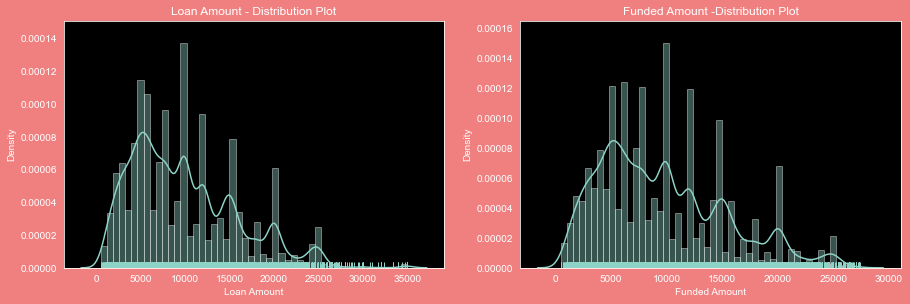

In [59]:
# Distplot of loan_amnt and funded_amnt, to see how data is distributed

plt.figure(figsize=(15,10),facecolor='lightcoral')
sns.set_style("dark")
with plt.style.context('dark_background'):

  #subplot1
  plt.subplot(2,2,1)
  ax=sns.distplot(loan_df['loan_amnt'],rug=True)
  ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')


  #subplot2
  plt.subplot(2,2,2)
  ax=sns.distplot(loan_df['funded_amnt'],rug=True)
  ax.set(title='Funded Amount -Distribution Plot',xlabel='Funded Amount')

  plt.show()

- **Observation:** 
> 1. Distribution of both Loan Amount and Funded Amount looks ~same
> 2. Most of loan amount is in range of 4000-12000

Text(0, 0.5, 'Interest Rate')

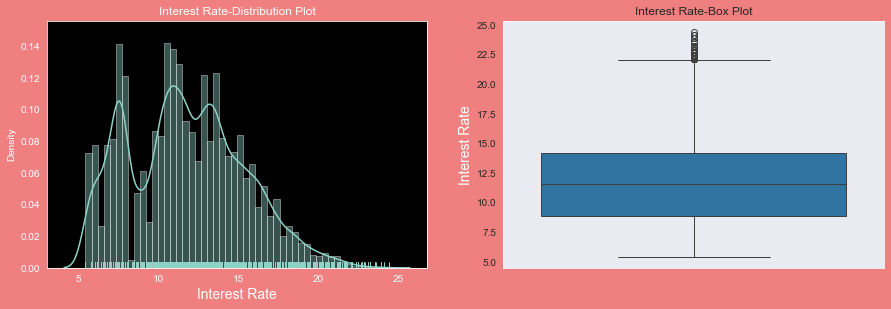

In [60]:
#distplot of Int_rate

plt.figure(figsize=(15,10),facecolor='lightcoral')

with plt.style.context('dark_background'):
  #subplot 1

  plt.subplot(2,2,1)
  ax=sns.distplot(loan_df['int_rate'],rug=True)
  ax.set(title='Interest Rate-Distribution Plot')
  ax.set_xlabel('Interest Rate',fontsize=14,color='w')

#subplot 2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loan_df['int_rate'])
ax.set(title='Interest Rate-Box Plot')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')

- **Observation:** 
> 1. int_rate is right skewed, we can say most loans were taken at low interest rate
> 2. Most of the interest rate lies between 8- 15 %


Text(0, 0.5, 'Annual Income')

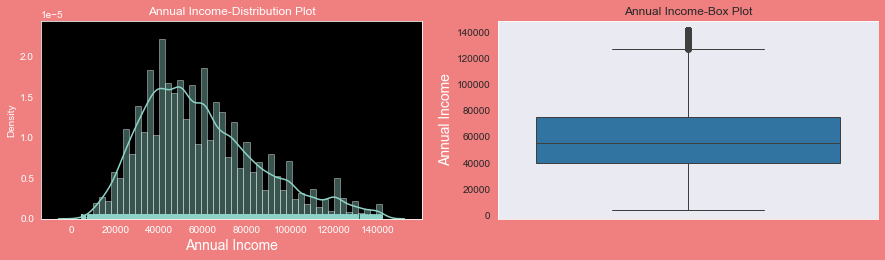

In [61]:
#distplot of annual_inc

plt.figure(figsize=(15,8),facecolor='lightcoral')

with plt.style.context('dark_background'):
  #Subplot1
  plt.subplot(2,2,1)
  ax=sns.distplot(loan_df['annual_inc'],rug=True)
  ax.set(title='Annual Income-Distribution Plot')
  ax.set_xlabel('Annual Income',fontsize=14,color='w')

#Subplot2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loan_df['annual_inc'])
ax.set(title='Annual Income-Box Plot')
ax.set_ylabel('Annual Income',fontsize=14,color='w')

- **Observation:**
> 1. Most of the Loan applicants annual income lies between 38,000- 75,000
> 2. Median Annual income is ~ 52,000

Text(0, 0.5, 'Installment')

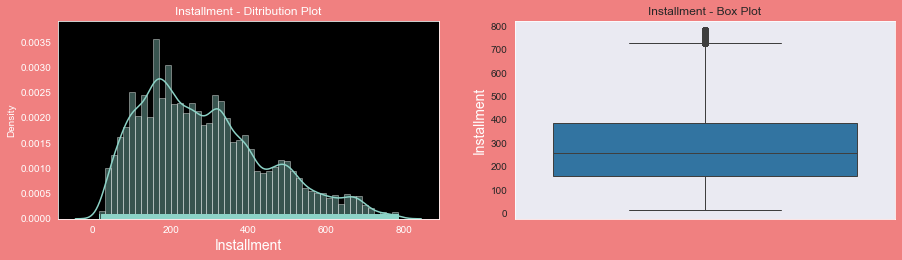

In [62]:
# distplot of installment
plt.figure(figsize=(15,8),facecolor='lightcoral')

with plt.style.context('dark_background'):
  #Subplot1
  plt.subplot(2,2,1)
  ax=sns.distplot(loan_df['installment'],rug=True)
  ax.set(title='Installment - Ditribution Plot')
  ax.set_xlabel('Installment',fontsize=14,color='w')

#Subplot2
sns.set_style("dark")
plt.subplot(2,2,2)
ax=sns.boxplot(y=loan_df['installment'])
ax.set(title='Installment - Box Plot')
ax.set_ylabel('Installment',fontsize=14,color='w')

- **Observation:**
> 1. distplot is right skewed, which means most borrowers installment is on lower side
> 2. Most borrowers monthly EMI installment is between 180 - 375


In [63]:
# Now we will filter out all int64 and float64 columns and plot histogram
loan_df_num = loan_df.select_dtypes(include = ['float64', 'int64'])
loan_df_num.head()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,Year
0,5000,5000,10.65,162.87,24000.0,27.65,3,0,83.7,9,2011
1,2500,2500,15.27,59.83,30000.0,1.00,3,0,9.4,4,2011
2,2400,2400,15.96,84.33,12252.0,8.72,2,0,98.5,10,2011
3,10000,10000,13.49,339.31,49200.0,20.00,10,0,21.0,37,2011
5,5000,5000,7.90,156.46,36000.0,11.20,9,0,28.3,12,2011


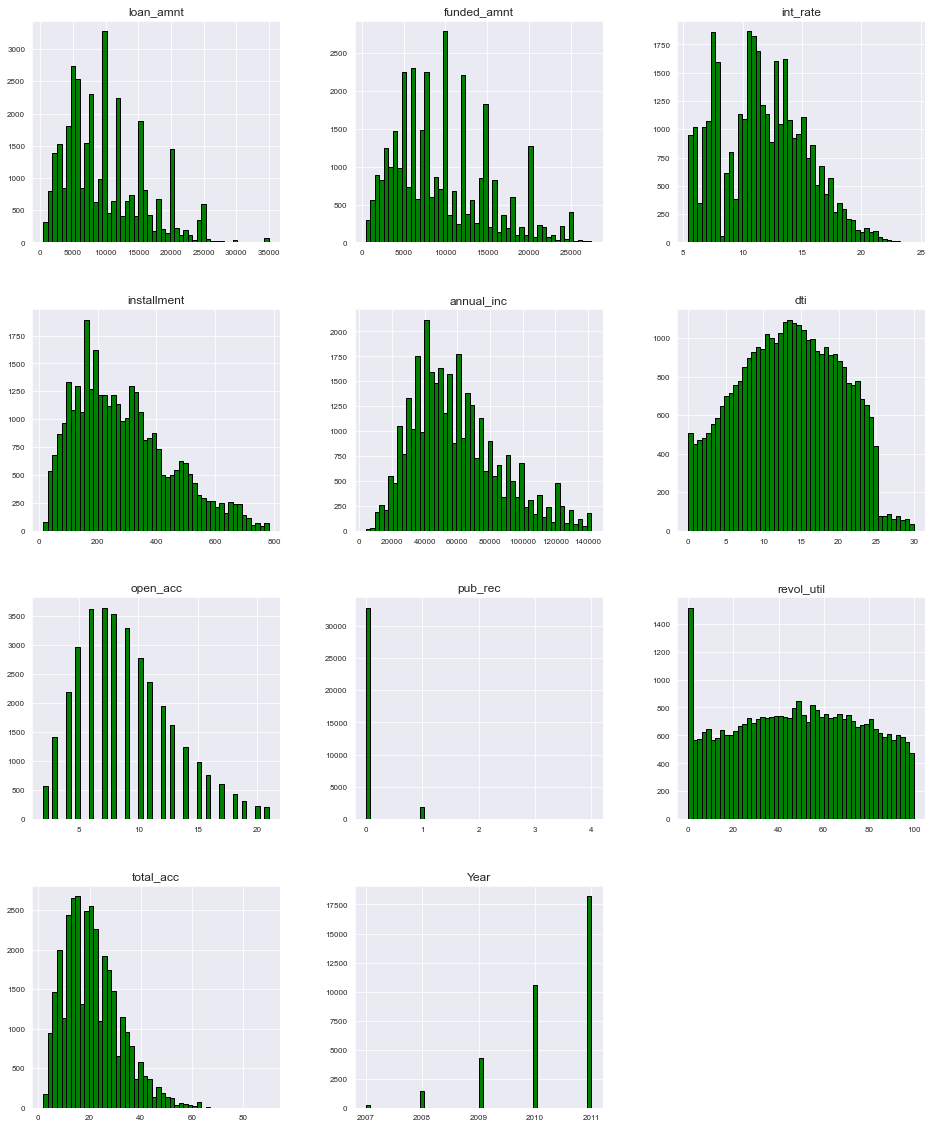

In [64]:
#Numerical Data Distribution 
#We will now take a look at how the numerical features are distributed.
loan_df_num.hist(figsize=(16,20), bins =50, xlabelsize=8, ylabelsize=8, color='g', edgecolor = 'black')
plt.show()

- **Observations:**
> 1. From Histplot of Year, can say we have high count of borrowers in 2011, borrowers count is increasing year on year. <br>
> 2. From HisPlot of total_acc,we can see it is right skewed which means most borrowers have less no of total_acc <br>
> 3. From Histplot of DTI, we can say Most Debt to income Ratio is between 6-20 % <br>
> 4. From histplot of pub_rec, we can say most borrowers have pub_rec count 0


- ### Now we will perform `Univariate Analysis` on Categorical Variables using countPlot and Pie Chart

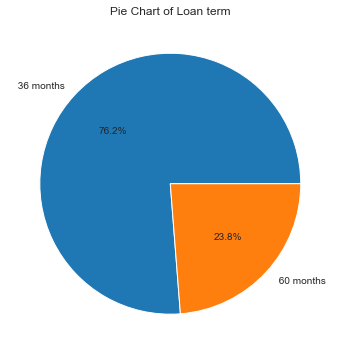

In [65]:
# Plotting Pie Chart for term
plt.figure(figsize=(8, 6))
loan_df['term'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of Loan term')
plt.ylabel('')
plt.show()

- **Observation:**
> 1. Above Pie chart shows that out of total loans issued ~76% have taken loan for 36 Months period

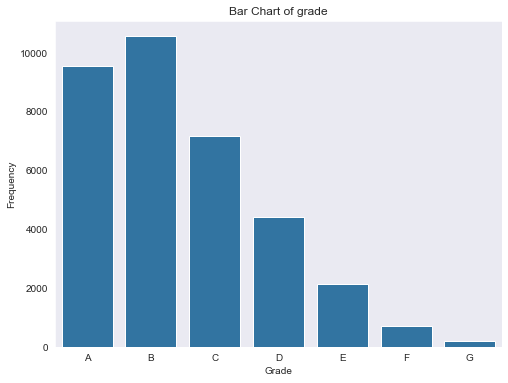

In [66]:
# Plotting Bar Chart for term
order=['A','B','C','D','E','F','G']

plt.figure(figsize=(8, 6))
sns.countplot(x=loan_df['grade'],order =order)
plt.title('Bar Chart of grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

- **Observation:**
> 1. We can see borrowers count decreases as we go from high credit rating (A) to low credit Rating (B)
> 2. A reason for this could be, lending platform release loan easily to borrowers who has good credit rating

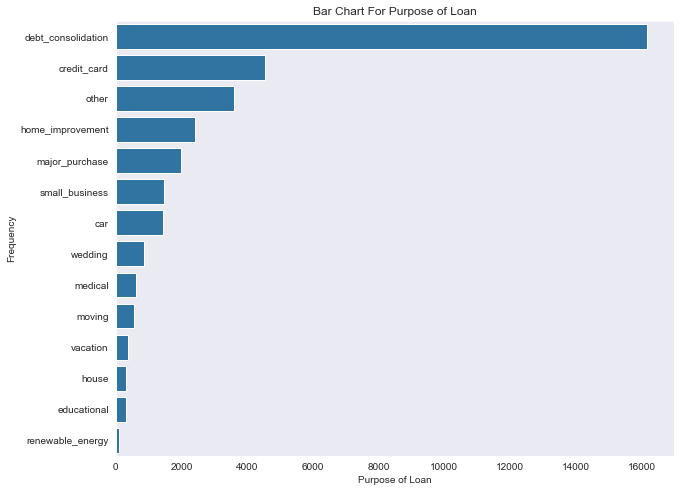

In [67]:
# Plotting Bar chart for home_ownership

plt.figure(figsize=(10,8))
sns.countplot(y='purpose', data=loan_df, order=loan_df['purpose'].value_counts().index)
plt.title('Bar Chart For Purpose of Loan')
plt.xlabel('Purpose of Loan')
plt.ylabel('Frequency')
plt.show()

- **Observations:**
> 1.The count plot shows that most loans were taken for debt_Consolidation

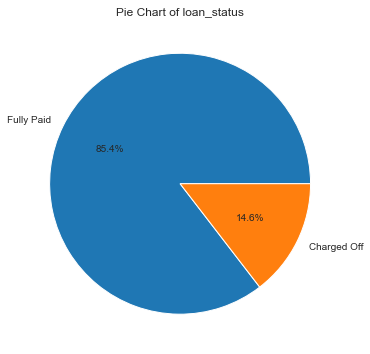

In [68]:
# Plotting Pie Chart for loan_status
plt.figure(figsize=(8, 6))
loan_df['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of loan_status')
plt.ylabel('')
plt.show()

- **Observations:**
> 1. Out of total loan issued ~ 15% loans were charged off 

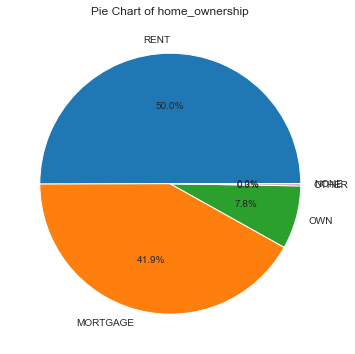

In [69]:
# Plotting Pie Chart for home_ownership

plt.figure(figsize=(8, 6))
loan_df['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart of home_ownership')
plt.ylabel('')
plt.show()

- **Observation:**
> 1. This pie chart shows that out of total borrowers 50% of them live on rent and ~42 have mortgage their house.

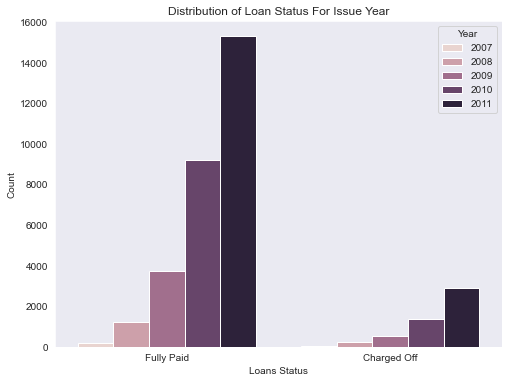

In [70]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(8,6))
sns.countplot(data=loan_df,x='loan_status',hue='Year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

- **Observations:**
> With each passing year total number of fully paid loans and charged off count are increasing exponentially.


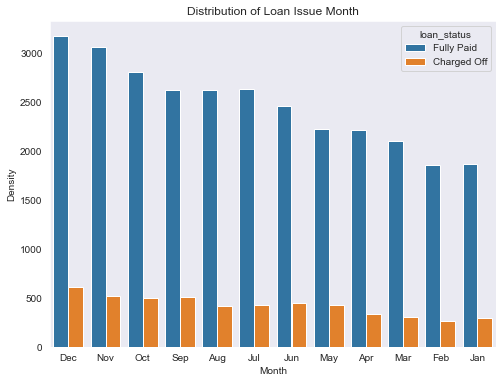

In [71]:
# Distribution of issue_month
plt.figure(figsize=(8,6))
sns.countplot(data=loan_df,x='Month',hue='loan_status')
plt.xlabel('Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

- **Observations:**
> Majority of the loans are given in last quarter of the year.

# <div style="background-color: lightblue; padding: 8px;">Bivariate Analysis</div>

- Bivariate analysis on `Annual Income` and `Charged Off Loans`

In [72]:
# loan_status, our target variable is a categorical variable, so let's check the sample size
loan_df['loan_status'].value_counts()

Fully Paid     29632
Charged Off     5047
Name: loan_status, dtype: int64

**Observations:** 
> we have high count of Fully Paid compared to Charged Off. So will analyse all other variables with chargedOff Proportion and not just count, because we have not same sample size of Fully_Paid and Charged_Off.

In [73]:
# Calculate Count of loan_status group by annual_inc_categories and loan_status
inc_range_vs_loan = loan_df.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().reset_index()

#Calculate total count charger_off + Fully_paid
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Fully Paid'] 

# Calculate Portion of loans which were charged off, within each annual_inc_categories
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']

#Sort in descending by Chargedoff_Proportion
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,"0-20,000",236,942,1178,0.200340
1,"20,000-40,000",1504,6961,8465,0.177673
2,"40,000-60,000",1660,9313,10973,0.151280
3,"60,000-80,000",924,6137,7061,0.130860
4,"80,000+",723,6279,7002,0.103256


Text(0, 0.5, 'Charged Off Proportion')

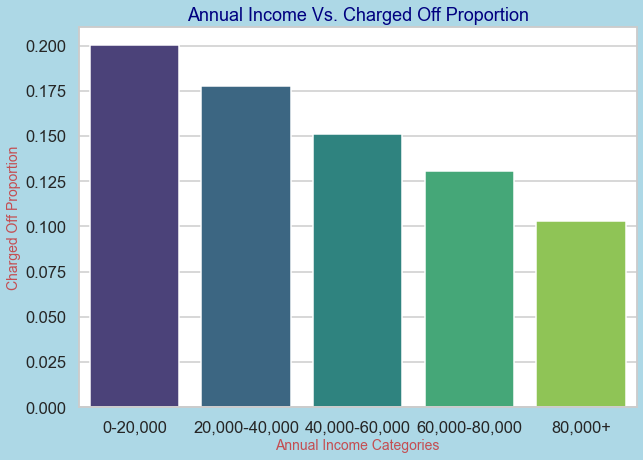

In [74]:
# Setting the theme and context for the plot
sns.set_theme(style="whitegrid", context="talk")

# Creating the figure and axis with specified size and background color
fig, ax1 = plt.subplots(figsize=(10, 7), facecolor='lightblue')

# Plotting the data using seaborn's barplot
sns.barplot(x='annual_inc_categories', y='Chargedoff_Proportion', data=inc_range_vs_loan, ax=ax1, palette='viridis')

# Customizing the plot's title and labels
ax1.set_title('Annual Income Vs. Charged Off Proportion', fontsize=18, color='navy')
ax1.set_xlabel('Annual Income Categories', fontsize=14, color='r')
ax1.set_ylabel('Charged Off Proportion', fontsize=14, color='r')


- **Observation:** 
> 1. Low income loan applicant has high change of charged off
> 2. As Annual income increases chance of chargeoff decreases

- We will perform Bivariate analysis on `Purpose of Loan` and `Charged Off proportion`

In [75]:
#Grouping by purpose and loan status
purpose_vs_loan = loan_df.groupby(['purpose','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total']=purpose_vs_loan['Charged Off']+purpose_vs_loan['Fully Paid']
purpose_vs_loan['ChargedOff_Proportion']=purpose_vs_loan['Charged Off']/purpose_vs_loan['Total']
purpose_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,ChargedOff_Proportion
11,small_business,392,1060,1452,0.269972
10,renewable_energy,18,73,91,0.197802
3,educational,52,249,301,0.172757
8,moving,89,450,539,0.165121
5,house,51,264,315,0.161905
9,other,577,3005,3582,0.161083
7,medical,99,530,629,0.157393
2,debt_consolidation,2476,13696,16172,0.153104
12,vacation,52,306,358,0.145251
4,home_improvement,299,2112,2411,0.124015


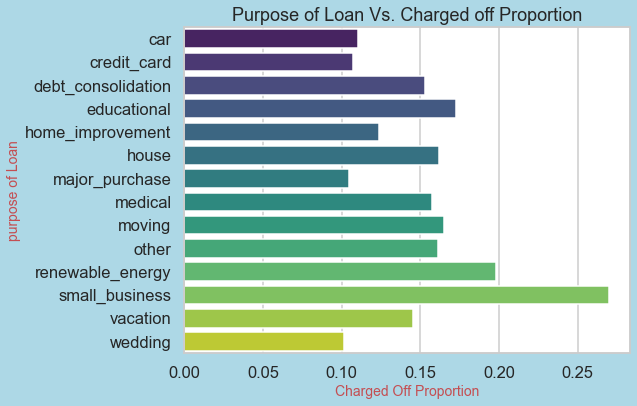

In [76]:
# Barplot on above calculated data

fig,ax1=plt.subplots(figsize=(8,6),facecolor='lightblue')
ax1.set(title='Purpose of Loan Vs. Charged off Proportion')
ax1=sns.barplot(x='ChargedOff_Proportion',y='purpose',data=purpose_vs_loan,palette='viridis')
ax1.set_xlabel('Charged Off Proportion',fontsize=14,color='r')
ax1.set_ylabel('purpose of Loan',fontsize=14,color='r')
plt.show()

- **Observations:**
> 1. Above barplot shows that loan taken for small_business has been charged_off more
> 2. So we can say loan taken for small business has high change of getting charged off

- Bivariate analysis on `Grade` and `Charged Off Loans`

In [77]:
# Grouping by grade and loan status of fully paid and charged off loans
grade_vs_loan=loan_df.groupby(['grade','loan_status']).loan_status.count().unstack().reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Fully Paid']
grade_vs_loan['ChargedOff_Proportion']=grade_vs_loan['Charged Off']/grade_vs_loan['Total']
grade_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,grade,Charged Off,Fully Paid,Total,ChargedOff_Proportion
6,G,68,123,191,0.356021
5,F,230,472,702,0.327635
4,E,585,1541,2126,0.275165
3,D,996,3414,4410,0.225850
2,C,1262,5899,7161,0.176232
1,B,1317,9235,10552,0.124810
0,A,589,8948,9537,0.061759


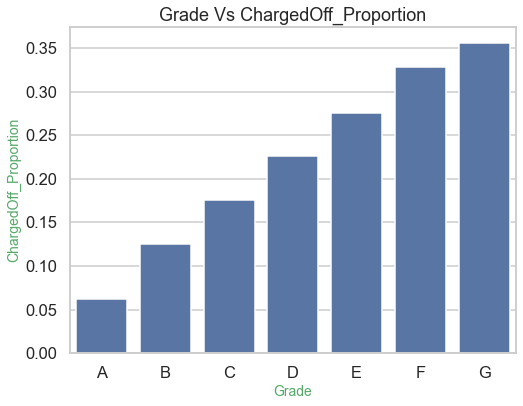

In [78]:
#barplot of grade on above calculated data

plt.figure(figsize=(8, 6))
sns.barplot(x='grade', y='ChargedOff_Proportion', data=grade_vs_loan)
plt.title('Grade Vs ChargedOff_Proportion')
plt.xlabel('Grade',fontsize=14,color='g')
plt.ylabel('ChargedOff_Proportion',fontsize=14,color='g')
plt.show()

- **Observations:**
> 1. Here Grade represents CreditProfile rating, 'A' represents highest rating while 'G' represents lowest rating.
> 2. From the above barplot we can see chargeoff_proportion is increasing as we go from A to G
> 3. We can say Borrowers having good creditProfile Rating has less chance of being chargedOff

- Bivariate analysis on `interest_rate_categories` and `Charged Off Loans`

In [79]:
# Grouping by interest rate categories and loan status of fully paid and charged off loans
interest_vs_loan=loan_df.groupby(['interest_rate_categories','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total']=interest_vs_loan['Charged Off'] + interest_vs_loan['Fully Paid']
interest_vs_loan['Charged_Off_Proportion']= interest_vs_loan['Charged Off']/interest_vs_loan['Fully Paid']
interest_vs_loan.sort_values('Charged_Off_Proportion',ascending=False)

loan_status,interest_rate_categories,Charged Off,Fully Paid,Total,Charged_Off_Proportion
2,18+,560,1042,1602,0.537428
1,9-18,3916,19854,23770,0.197240
0,0-9,571,8736,9307,0.065362


Text(0, 0.5, 'Charged Off Proportion')

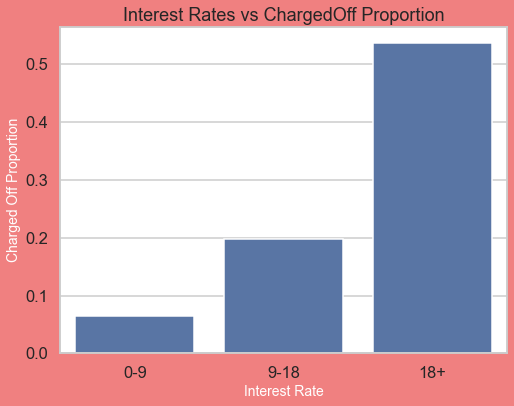

In [80]:
# barplot of interest_rate_category on above calculated data

fig1,ax1=plt.subplots(figsize=(8,6),facecolor='lightcoral')
ax1.set(title='Interest Rates vs ChargedOff Proportion')
ax1=sns.barplot(x='interest_rate_categories',y='Charged_Off_Proportion',data=interest_vs_loan)
ax1.set_xlabel('Interest Rate',fontsize=14,color='w')
ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

- **Observations:**
> 1. From the above barplot we can say that for interest_rate lower than 9% chargedOff_proportion is lo, while for interest rate higher than 18% chargedOff_Proportion is high
> 2. So, we can say higher loan having high interest_rate are more prone to get chargedOff

- Bivariate analysis on `home_ownership` and `Charged Off Loans`

In [81]:
# Grouping by home ownership and loan status of fully paid and charged off loans

interest_vs_home_ownership=loan_df.groupby(['home_ownership','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total']=interest_vs_home_ownership['Charged Off'] + interest_vs_home_ownership['Fully Paid']
interest_vs_home_ownership['Charged_Off_Proportion']= interest_vs_home_ownership['Charged Off']/interest_vs_home_ownership['Fully Paid']
interest_vs_home_ownership.sort_values('Charged_Off_Proportion',ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Charged_Off_Proportion
2,OTHER,16.0,74.0,0.216216
4,RENT,2650.0,14704.0,0.180223
3,OWN,409.0,2309.0,0.177133
0,MORTGAGE,1972.0,12542.0,0.157232
1,NONE,0.0,3.0,0.000000


Text(0, 0.5, 'Charged Off Proportion')

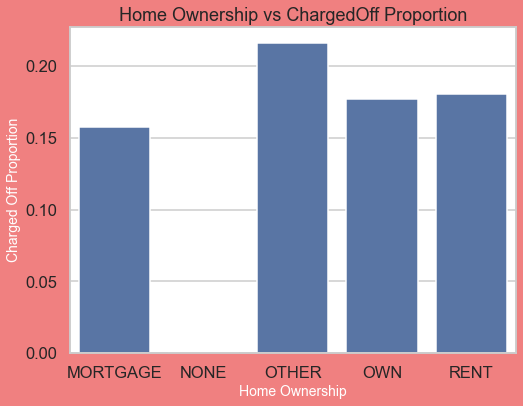

In [82]:
#barplot of home_ownership on above calculated data

fig1,ax1=plt.subplots(figsize=(8,6),facecolor='lightcoral')
ax1.set(title='Home Ownership vs ChargedOff Proportion')
ax1=sns.barplot(x='home_ownership',y='Charged_Off_Proportion',data=interest_vs_home_ownership)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Charged Off Proportion',fontsize=14,color='w')

- **Observations:**
> 1.Above barplot shows that borrowers whose home_ownership is others has chargedOff more <br>
> 2.But we don't have strong eveidence here to draw any conclusion which is more prone to chargedoff.

- Bivariate analysis on `pub_rec` and `Charged Off Loans`

In [83]:
# Grouping by derogatory public records count and loan status of fully paid and charged off loans

Pubrec_Vs_Loan=loan_df.groupby(['pub_rec','loan_status']).loan_status.count().unstack().reset_index()
Pubrec_Vs_Loan['Total']=Pubrec_Vs_Loan['Charged Off'] + Pubrec_Vs_Loan['Fully Paid']
Pubrec_Vs_Loan['Chargeoff_Proportion']=Pubrec_Vs_Loan['Charged Off']/Pubrec_Vs_Loan['Total']
Pubrec_Vs_Loan.sort_values('Chargeoff_Proportion',ascending=False)

loan_status,pub_rec,Charged Off,Fully Paid,Total,Chargeoff_Proportion
1,1,430.0,1475.0,1905.0,0.225722
2,2,10.0,35.0,45.0,0.222222
0,0,4607.0,28114.0,32721.0,0.140796
3,3,NaN,6.0,NaN,NaN
4,4,NaN,2.0,NaN,NaN


Text(0, 0.5, 'Chargedoff Proportion')

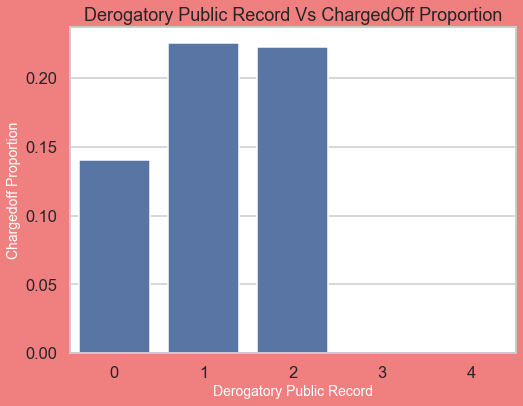

In [84]:
#barplot of pub_rec on above calculated data

fig,ax1=plt.subplots(figsize=(8,6),facecolor='lightcoral')
ax1.set_title('Derogatory Public Record Vs ChargedOff Proportion')
ax1=sns.barplot(x='pub_rec',y='Chargeoff_Proportion',data=Pubrec_Vs_Loan)
ax1.set_xlabel('Derogatory Public Record',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

- **Observations:**
> 1. Derogatory public records are negative entries in an individual's credit history that are publicly accessible and can significantly impact their creditworthiness. <br>
> 2. From above Barchart we can say that, those having 1,2 Derogatory Public record are more prone to ChargedOff than those borrowers who have 0 Derogatory Public Record <br>
> 3. Since we don't have any data for 3,4 Derogatory Public Record, and also 1 and 2 record ChargedOff count is approx same. We don't have strong evidence to draw any definite conclusion

- Bivariate analysis on `pub_rec_bankruptcies` and `Charged Off Loans`

In [85]:
# Grouping by public bankrupcy count and loan status of fully paid and charged off loans
bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
bankruptcies_vs_loan['Total'] = bankruptcies_vs_loan['Charged Off'] + bankruptcies_vs_loan['Fully Paid']
bankruptcies_vs_loan['ChargedOff_Proportion'] = bankruptcies_vs_loan['Charged Off']/bankruptcies_vs_loan['Total']
bankruptcies_vs_loan.sort_values('ChargedOff_Proportion', ascending=False)

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,2.0,2,3,5,0.400000
1,1.0,343,1207,1550,0.221290
3,Not Known,96,517,613,0.156607
0,0.0,4606,27905,32511,0.141675


Text(0, 0.5, 'Chargedoff Proportion')

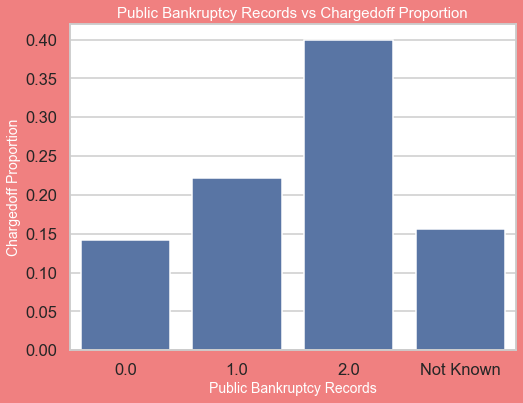

In [86]:
#barplot of pub_rec_bankrupticies on above calculated data

fig,ax1=plt.subplots(figsize=(8,6),facecolor='lightcoral')
ax1.set_title('Public Bankruptcy Records vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies',y='ChargedOff_Proportion',data=bankruptcies_vs_loan)
ax1.set_xlabel('Public Bankruptcy Records',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

**Observation:**
> 1.From above barplot we can say higher the number of Public Bankruptcy record ,higher the chargedOff Proportion <br>
> 2.Risk of ChargedOff is high, if borrower's Public bankruptcy Record countis high

- Bivariate analysis on `emp_length` and `Charged Off Loans`

In [87]:
# Grouping by employement length and loan status of fully paid and charged off loans
emplen_vs_loan = loan_df.groupby(['emp_length','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emplen_vs_loan['Total'] = emplen_vs_loan['Charged Off'] + emplen_vs_loan['Fully Paid']
emplen_vs_loan['ChargedOff_Proportion'] = emplen_vs_loan['Charged Off']/emplen_vs_loan['Total']
emplen_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,emp_length,Charged Off,Fully Paid,Total,ChargedOff_Proportion
0,0,217,760,977,0.222108
2,10,1133,6098,7231,0.156686
8,7,233,1310,1543,0.151005
9,8,181,1071,1252,0.144569
1,1,1010,6071,7081,0.142635
6,5,411,2472,2883,0.142560
7,6,278,1697,1975,0.140759
4,3,509,3164,3673,0.138579
5,4,412,2626,3038,0.135616
3,2,520,3418,3938,0.132047


Text(0, 0.5, 'Chargedoff Proportion')

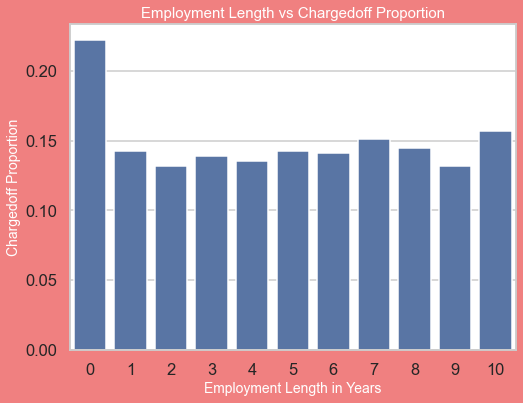

In [88]:
#barplot of emp_length on above calculated data

order=[0,1,2,3,4,5,6,7,8,9,10]
fig,ax1=plt.subplots(figsize=(8,6),facecolor='lightcoral')
ax1.set_title('Employment Length vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='emp_length',y='ChargedOff_Proportion',data=emplen_vs_loan,order=order)
ax1.set_xlabel('Employment Length in Years',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

**Observations:**
> 1. In the above barplot, 0 years employment length has high chargedOff Proportion, but 0 is the value we have imputed for NaN as part of our data cleaning.
> 2. By looking rest of the bars, we are not getting any conclusive evidence on impact of employment years on chargedOff.

- Bivariate analysis on `varification_status` and `Charged Off Loans`

In [89]:
# Grouping by verification status and loan status of fully paid and charged off loans

verificationstatus_vs_loan = loan_df.groupby(['verification_status','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verificationstatus_vs_loan['Total'] = verificationstatus_vs_loan['Charged Off'] + verificationstatus_vs_loan['Fully Paid']
verificationstatus_vs_loan['ChargedOff_Proportion'] = verificationstatus_vs_loan['Charged Off']/verificationstatus_vs_loan['Total']
verificationstatus_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,verification_status,Charged Off,Fully Paid,Total,ChargedOff_Proportion
2,Verified,1687,8198,9885,0.170663
1,Source Verified,1326,7578,8904,0.148922
0,Not Verified,2034,13856,15890,0.128005


Text(0, 0.5, 'Chargedoff Proportion')

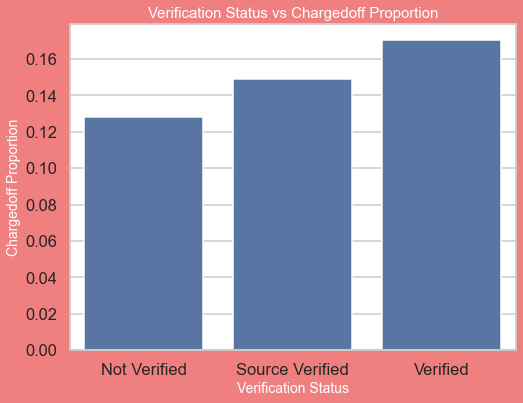

In [90]:
#barplot of verification_status (If the income was LC verified or not) on above calculated data

fig,ax1=plt.subplots(figsize=(8,6),facecolor='lightcoral')
ax1.set_title('Verification Status vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='verification_status',y='ChargedOff_Proportion',data=verificationstatus_vs_loan)
ax1.set_xlabel('Verification Status',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

**Observations:**
> 1. Varification Status Indicates if income was verified by LC, not verified, or if the income source was verified.
> 2. We can see chargedOff Proportion of verified is higher, but difference in chargedOff Proportion across different varification_status is not good enough to draw any conclusion.

- Bivariate analysis on `addr_state` and `Charged Off Loans`

In [91]:
# Grouping by state and loan status of fully paid and charged off loans

state_vs_loan = loan_df.groupby(['addr_state','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
state_vs_loan['Total'] = state_vs_loan['Charged Off'] + state_vs_loan['Fully Paid']
state_vs_loan['ChargedOff_Proportion'] = state_vs_loan['Charged Off']/state_vs_loan['Total']
state_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,addr_state,Charged Off,Fully Paid,Total,ChargedOff_Proportion
28,NE,3.0,2.0,5.0,0.600000
32,NV,95.0,343.0,438.0,0.216895
40,SD,12.0,46.0,58.0,0.206897
13,ID,1.0,4.0,5.0,0.200000
0,AK,13.0,56.0,69.0,0.188406
11,HI,28.0,121.0,149.0,0.187919
9,FL,451.0,2074.0,2525.0,0.178614
31,NM,30.0,140.0,170.0,0.176471
24,MO,108.0,512.0,620.0,0.174194
4,CA,1003.0,5222.0,6225.0,0.161124


Text(0, 0.5, 'Chargedoff Proportion')

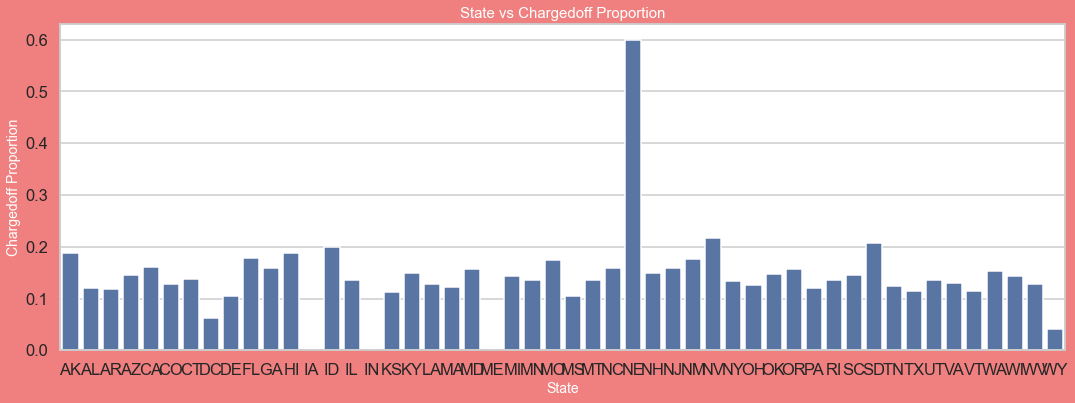

In [94]:
#barplot of addr_state on above calculated data

fig,ax1=plt.subplots(figsize=(18,6),facecolor='lightcoral')
ax1.set_title('State vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state',y='ChargedOff_Proportion',data=state_vs_loan)
ax1.set_xlabel('State',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

- **Observations:**
> 1. From the above barplot we can say Borrowers who are from NE has high change of being chargedOff, But number of applicants from NE is very less (5) and so don't have enough evidence to conclude this.

- Bivariate analysis on `installment_category` and `Charged Off Loans`

In [95]:
# Grouping by installment category and loan status of fully paid and charged off loans

installmentcategory_vs_loan = loan_df.groupby(['installment_category','loan_status']).loan_status.count().unstack().fillna(0).reset_index()
installmentcategory_vs_loan['Total'] = installmentcategory_vs_loan['Charged Off'] + installmentcategory_vs_loan['Fully Paid']
installmentcategory_vs_loan['ChargedOff_Proportion'] = installmentcategory_vs_loan['Charged Off']/installmentcategory_vs_loan['Total']
installmentcategory_vs_loan.sort_values('ChargedOff_Proportion',ascending=False)

loan_status,installment_category,Charged Off,Fully Paid,Total,ChargedOff_Proportion
4,600+,281,1436,1717,0.163658
3,450-600,698,3576,4274,0.163313
0,0-150,1097,6445,7542,0.145452
2,300-450,1239,7281,8520,0.145423
1,150-300,1714,10788,12502,0.137098


Text(0, 0.5, 'Chargedoff Proportion')

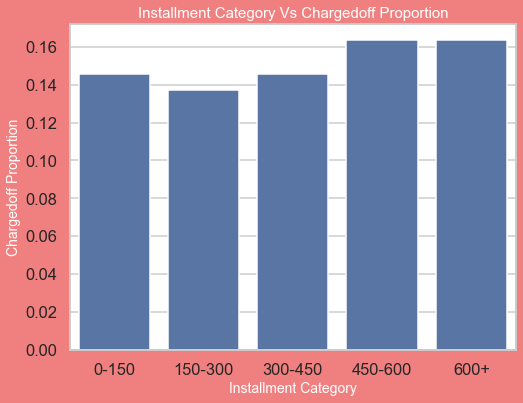

In [96]:
#barplot of installment_category on above calculated data

fig,ax1=plt.subplots(figsize=(8,6),facecolor='lightcoral')
ax1.set_title('Installment Category Vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='installment_category',y='ChargedOff_Proportion',data=installmentcategory_vs_loan)
ax1.set_xlabel('Installment Category',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')

- **Observation:**
> 1. From above barplot, ChargedOff Proportion is almost same for all installment Category. So don't have any evidence to draw any conclusion .

- Bivariate analysis on `loan term` and `interest rate`

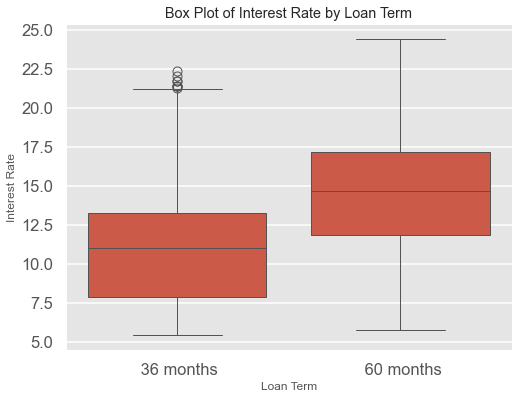

In [97]:
# Plotting Box Plot for Interest Rate and Term of loan
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    sns.boxplot(x='term', y='int_rate', data=loan_df)
    plt.title('Box Plot of Interest Rate by Loan Term')
    plt.xlabel('Loan Term')
    plt.ylabel('Interest Rate')


**Observation**
> 1. In the  above box plot, we can see .25,.5,.75 quartile is higher for 60 month loan term than 36 month loan term. <br>
> 2. So we can say longer the loan term , higher the interest rate

- Bivariate analysis of `interest rate` and `Debt to income ratio`

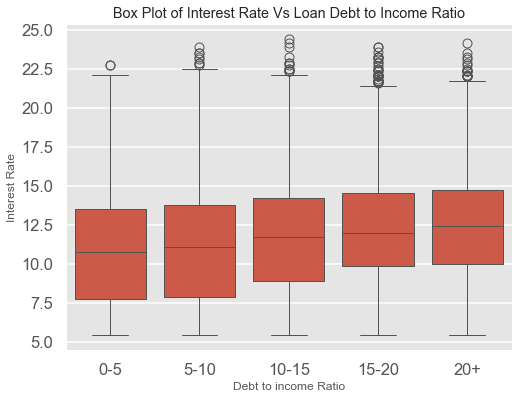

In [98]:
# Plotting Box Plot for Interest Rate and Term of loan
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    sns.boxplot(x='dti_categories', y='int_rate', data=loan_df)
    plt.title('Box Plot of Interest Rate Vs Loan Debt to Income Ratio')
    plt.xlabel('Debt to income Ratio')
    plt.ylabel('Interest Rate')

**Observation:**
> 1. We can see ,as Debt to income ratio increasing , the median,.25 and .75 quartile also increasing.<br>
> 2. We can say,lower the debt to income ratio, lower the interest rate. But  there's no significant variation  theres slight increase in interest rate, not a strong and definitive conclusion

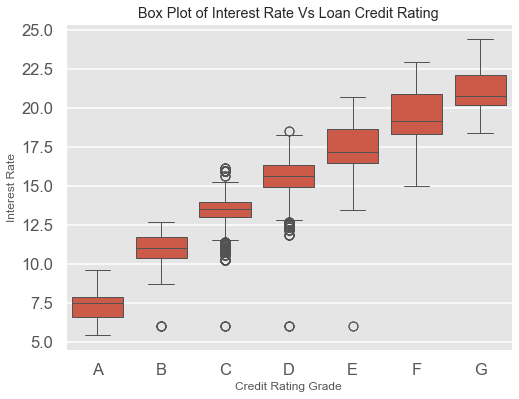

In [99]:
# Plotting Box Plot for Interest Rate Vs  Grade
plt.figure(figsize=(8,6))
with plt.style.context('ggplot'):
    sns.boxplot(x='grade', y='int_rate', data=loan_df,order='ABCDEFG')
    plt.title('Box Plot of Interest Rate Vs Loan Credit Rating')
    plt.xlabel('Credit Rating Grade')
    plt.ylabel('Interest Rate')

**Observations:**
> 1. Here 'A' represents top rating and 'G' represents lowest rating, This credit rating is given by lender. <br>
> 2. We can see interest rate is increasing as we move from Grade 'A' to grade 'G'
> 3. Higher the credit rating, most likely borrower will get loan at lower interest rate.


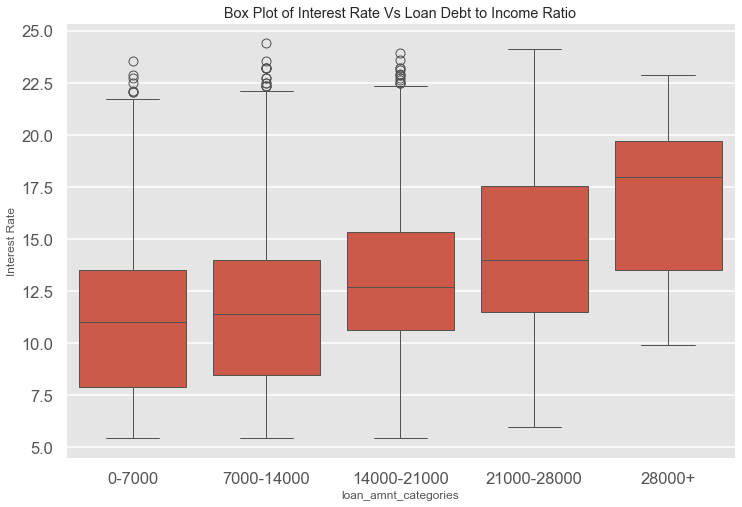

In [100]:
# Plotting Box Plot for Interest Rate Vs  loan_amnt_categories
plt.figure(figsize=(12,8))
with plt.style.context('ggplot'):
    sns.boxplot(x='loan_amnt_categories', y='int_rate', data=loan_df)
    plt.title('Box Plot of Interest Rate Vs Loan Debt to Income Ratio')
    plt.xlabel('loan_amnt_categories')
    plt.ylabel('Interest Rate')

**Observation:**
> 1. We can see interest rate is increasing with increase in loan_amount. <br>
> 2. This may be because, for high loan amount loan was taken for longer tetm and we has earlier, interest rate was higher for longer lone term.

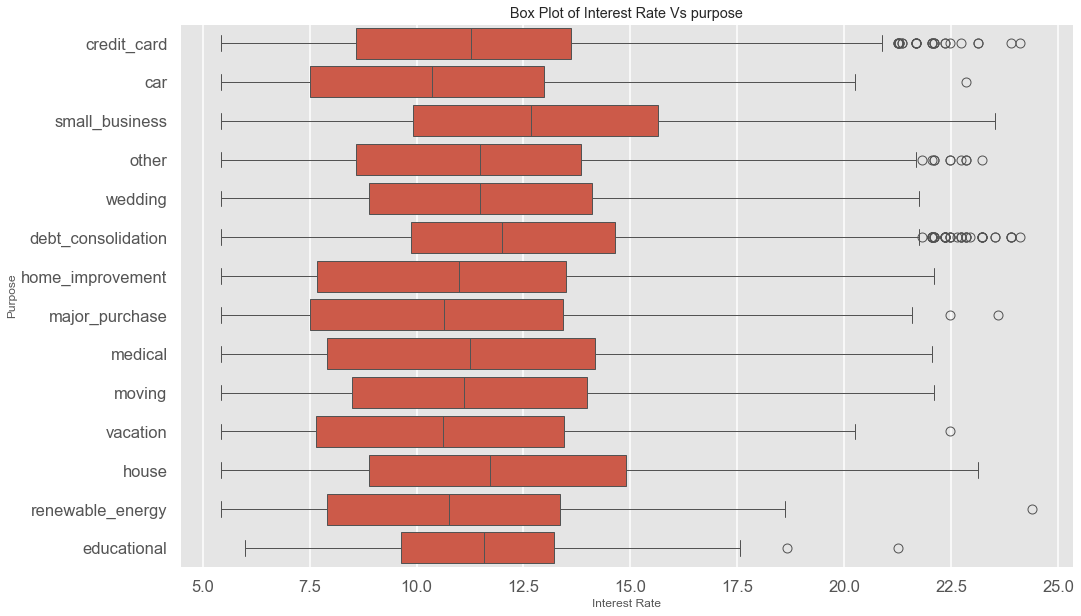

In [101]:
# Plotting Box Plot for Interest Rate Vs  loan_amnt_categories
plt.figure(figsize=(16,10))
with plt.style.context('ggplot'):
    sns.boxplot(x='int_rate', y='purpose', data=loan_df)
    plt.title('Box Plot of Interest Rate Vs purpose')
    plt.xlabel('Interest Rate')
    plt.ylabel('Purpose')

**Observations:**
> 1. From above "Purpose of loan" Vs "Interest rate" box plot, we can clearly say, People who have taken loan for small_business, has mostly got loan at highest interest_rate


In [102]:
# Now, we will Find correlation between all numerical variables
correlation=loan_df.corr()
correlation

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_util,total_acc,Year
loan_amnt,1.000000,0.974076,0.248057,0.914438,0.347028,0.092736,0.174209,-0.034782,0.069703,0.226362,0.081521
funded_amnt,0.974076,1.000000,0.254277,0.950637,0.341318,0.092646,0.171692,-0.035590,0.075814,0.219839,0.095587
int_rate,0.248057,0.254277,1.000000,0.222143,0.011647,0.101843,-0.066345,0.108621,0.477637,-0.111927,0.017883
installment,0.914438,0.950637,0.222143,1.000000,0.337806,0.079593,0.161398,-0.031109,0.104856,0.191015,0.023863
annual_inc,0.347028,0.341318,0.011647,0.337806,1.000000,-0.083258,0.266936,-0.002834,0.042015,0.382382,0.030073
dti,0.092736,0.092646,0.101843,0.079593,-0.083258,1.000000,0.301714,-0.005436,0.275489,0.240138,0.090962
open_acc,0.174209,0.171692,-0.066345,0.161398,0.266936,0.301714,1.000000,0.007710,-0.094559,0.663951,0.014984
pub_rec,-0.034782,-0.035590,0.108621,-0.031109,-0.002834,-0.005436,0.007710,1.000000,0.060878,-0.012098,-0.003149
revol_util,0.069703,0.075814,0.477637,0.104856,0.042015,0.275489,-0.094559,0.060878,1.000000,-0.074486,0.061410
total_acc,0.226362,0.219839,-0.111927,0.191015,0.382382,0.240138,0.663951,-0.012098,-0.074486,1.000000,0.049394


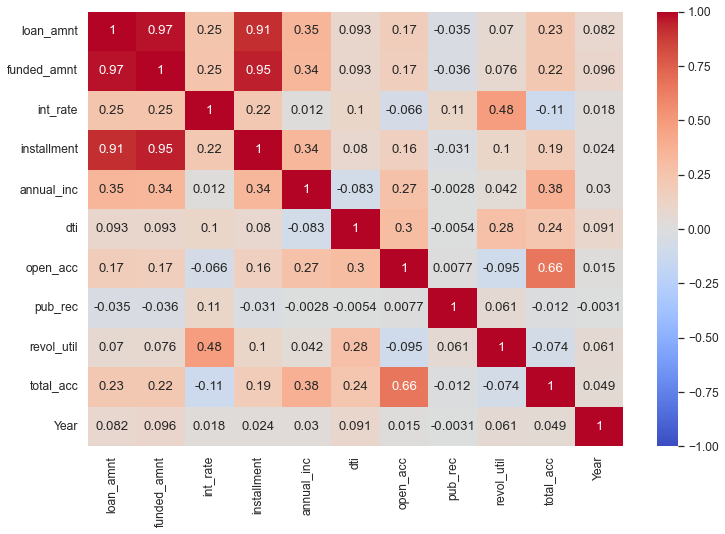

In [104]:
# Now we will use heatmap to visuallise above correlations
sns.set(font_scale=1.1)
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True,cmap='coolwarm', vmin=-1, vmax=1);
plt.show()

**Observations:**
- Positive correlations means directly proportional
- Negative correlations means inversaly proportional
> 1. Loan_amount and Interest_Rate are positively correlated, which means higher the loan_amount higher the interest_rate
> 2. Loan_amount and annual_income are positively correlated, which means higher the annual_income higher the loan_amount
> 3. interest_rate and installment are positively correlated, higher the interest_rate higher the installment.
> 4. Annual_income and debt_to_income_ratio is negatively correlated, higher the annual_income lower the debt_to_income_ratio <br>
> 5. Interest_rate and credit_utilization is positively correlated, higher the credit_utilization (revol_util) higher is the interest_rate

# <div style="background-color: lightblue; padding: 8px;">Segmented Analysis</div>

- For Segmented analysis, we will pick the top 5 Purpose for which most loans have been taken.
- After that we will Analyse loan_status for each of these 5 purpose within other variable like term, home_ownership, grade,emp_length,loan_amount, int_rate, dti, annual_income.
- For better analysis we will be binning the numerical variables in High,Low and Medium

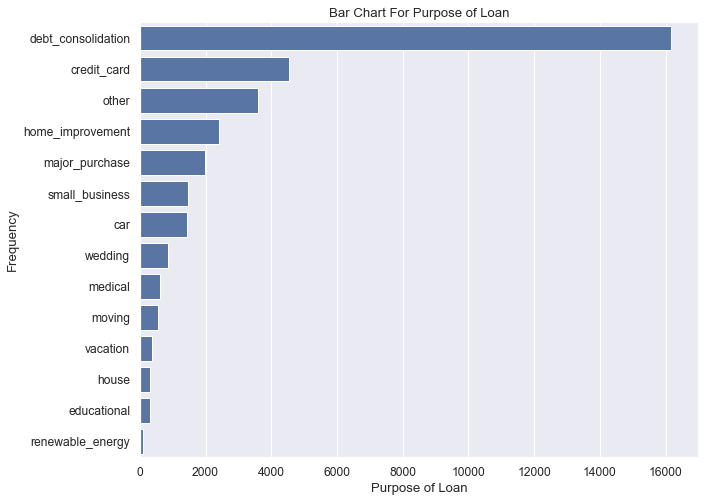

In [105]:
#Plot countplot to see count of loans for each purpose, we will be picking top 5 for further analysis
plt.figure(figsize=(10,8))
sns.countplot(y='purpose', data=loan_df, order=loan_df['purpose'].value_counts().index)
plt.title('Bar Chart For Purpose of Loan')
plt.xlabel('Purpose of Loan')
plt.ylabel('Frequency')
plt.show()

- Top 5 purpose for which most loans have been taken are : debt_consolidation,credit_card,home_improvment,major_purchase,small_business

In [106]:
# filtering the loan_df for the 5 types of loans mentioned above, and will see it's distributions.
# We will create a new dataframe seg_loan_df containing record for the 5 filtered purpose for segmented analysis.

top_purposes = ["credit_card","small_business","debt_consolidation","home_improvement","major_purchase"]
seg_loan_df = loan_df[loan_df['purpose'].isin(top_purposes)]
seg_loan_df['purpose'].value_counts()

debt_consolidation    16172
credit_card            4543
home_improvement       2411
major_purchase         1992
small_business         1452
Name: purpose, dtype: int64

In [107]:
# Converting fully paid to 0 & charged-off to 1.
# Purpose of doing this so that ,i can use loan_status on y axis in a bar plot, and measure other attributes against it quantitatively.

seg_loan_df['loan_status'] = seg_loan_df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)


In [108]:
# Define custom function to plot default rate segmented by purpose
def plot_segmented_cat_var(x_variable):
    with plt.style.context('ggplot'):
# Calculate default rate for each category
        default_rate_df = seg_loan_df.groupby([x_variable, 'purpose'])['loan_status'].mean().reset_index()
# Plot
        plt.figure(figsize=(16, 8))
        plt.xticks(rotation=45, ha='right')
        sns.barplot(x=x_variable, y='loan_status', hue='purpose', data=default_rate_df, palette="husl")
        plt.title(f"Default Rate Vs {x_variable} segmented by Purpose")
        plt.xlabel(x_variable,fontsize=14)
        plt.ylabel("Default Rate",fontsize=14)
        plt.legend(title='Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

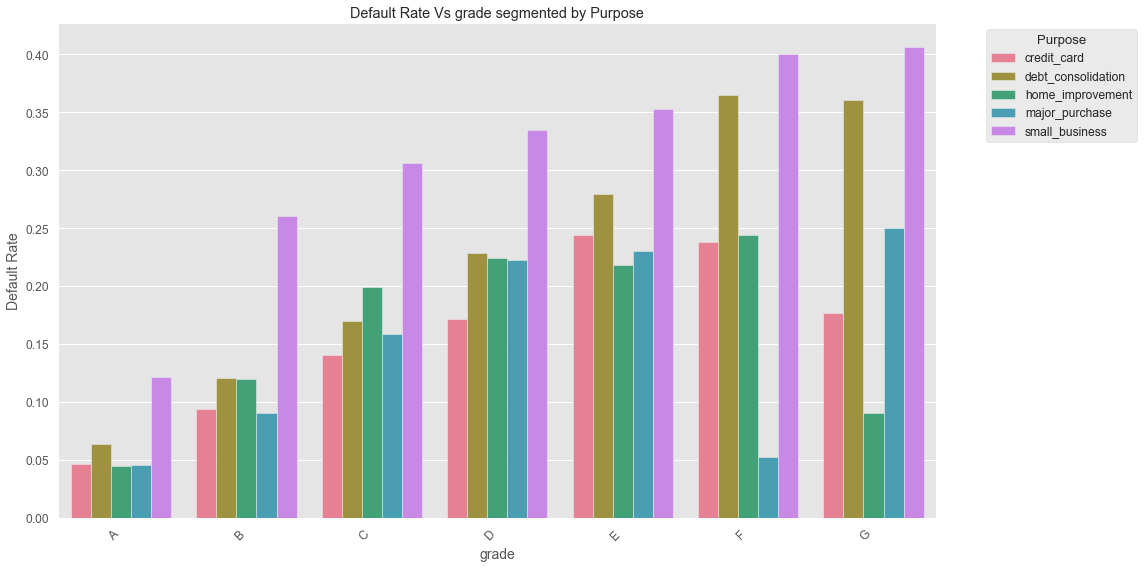

In [109]:
# use above created function to plot barplot between default_rate and grade, segmented by Purpose.

plot_segmented_cat_var('grade')

**Observations:**
> 1. Loan taken for small_business has highest default rate across all grade from 'A' to 'G', also default rate is increase for small_business purpose loan as credit rating of borrers decreasing ('A' represents highest rating).    <br>
> 2. Also for debt_reconcilation purpose loan,default rate is increasing as credit ration of borrowers decreasing. Frow grade 'F' and 'G' it has almost same default rate.

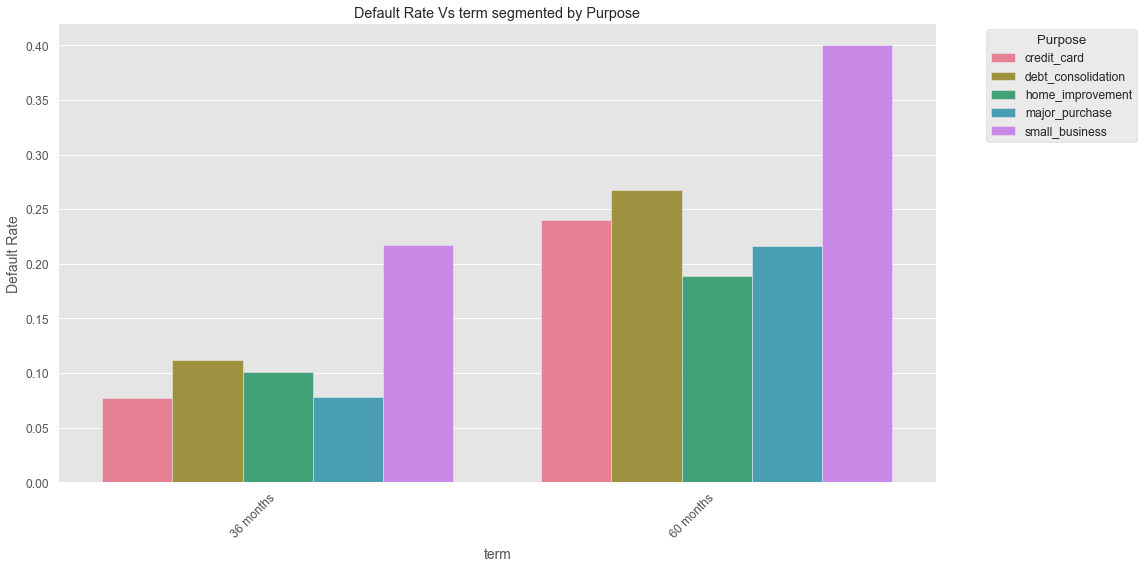

In [110]:
# use above created function to plot barplot between default_rate and term, segmented by Purpose.
plot_segmented_cat_var('term')

**Observations:**
> 1.Default rate of small_business purpose lone is higher than the other four purpose in both 36 month and 60 month term loan.  <br>
> 2. Also default rate for all four purpose loan is higher for 60 month loan term.

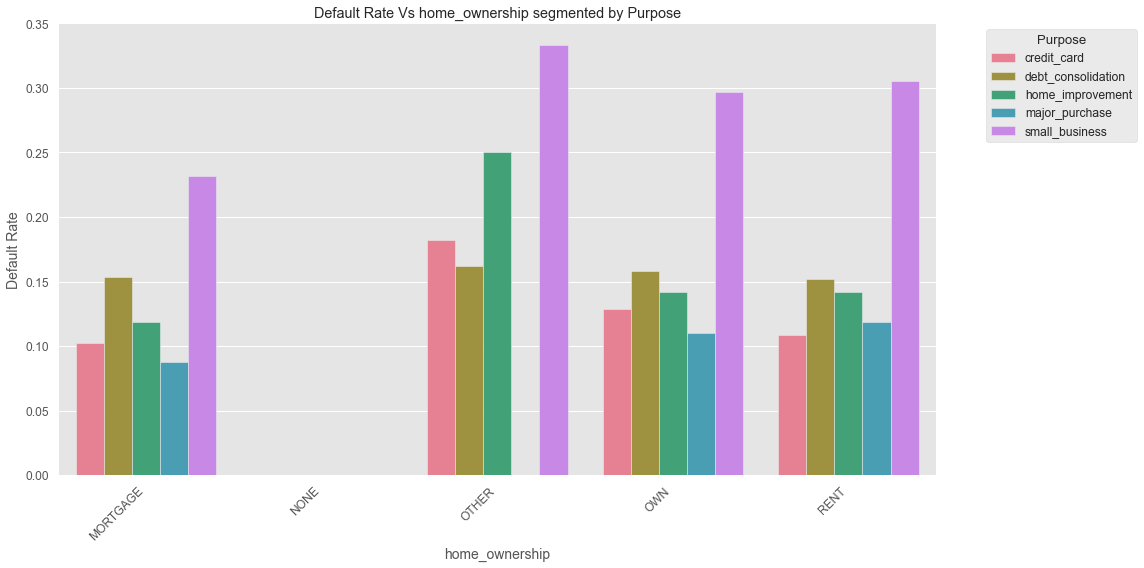

In [111]:
# use above created function to plot barplot between default_rate and term, segmented by Purpose.

plot_segmented_cat_var('home_ownership')

**Observations:**
> 1. small_business has highest default rate no matter if the borrower leave in rented house, or own house or have mortgage their house.

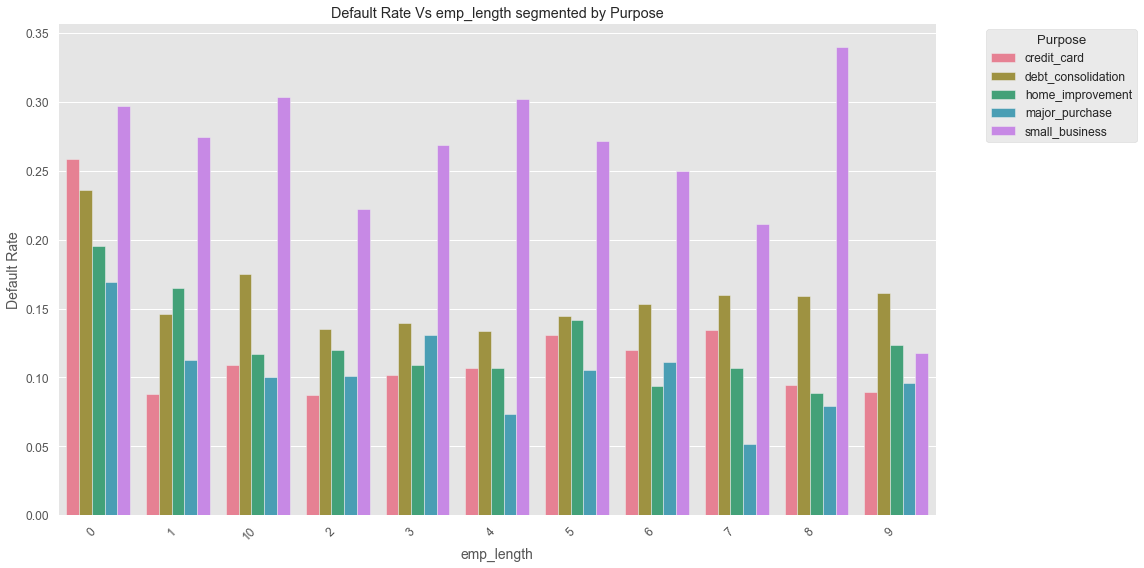

In [112]:
# use above created function to plot barplot between default_rate and emp_length, segmented by Purpose.

plot_segmented_cat_var('emp_length')

**Obesrvations:**
> 1. For all, emp_length small_business has highest default rate.<br>
> 2. So, no matter what's the employment period of the borrower is, if he his taking loan for small_business than it has high chance of ChargedOff compared to other loan for other purpose

In [113]:
#Binning loan amount, so that can analyze it as acategorical variable against default_rate segmented by purpose

def loan_amount_binning_func(loan_amount_value):
  if loan_amount_value < 5000:
      return 'low'
  elif loan_amount_value >=5000 and loan_amount_value < 15000:
      return 'medium'
  else:
      return 'high'

# Appling above function on loan_amnt 
seg_loan_df['loan_amnt'] = seg_loan_df['loan_amnt'].apply(lambda x: loan_amount_binning_func(x))

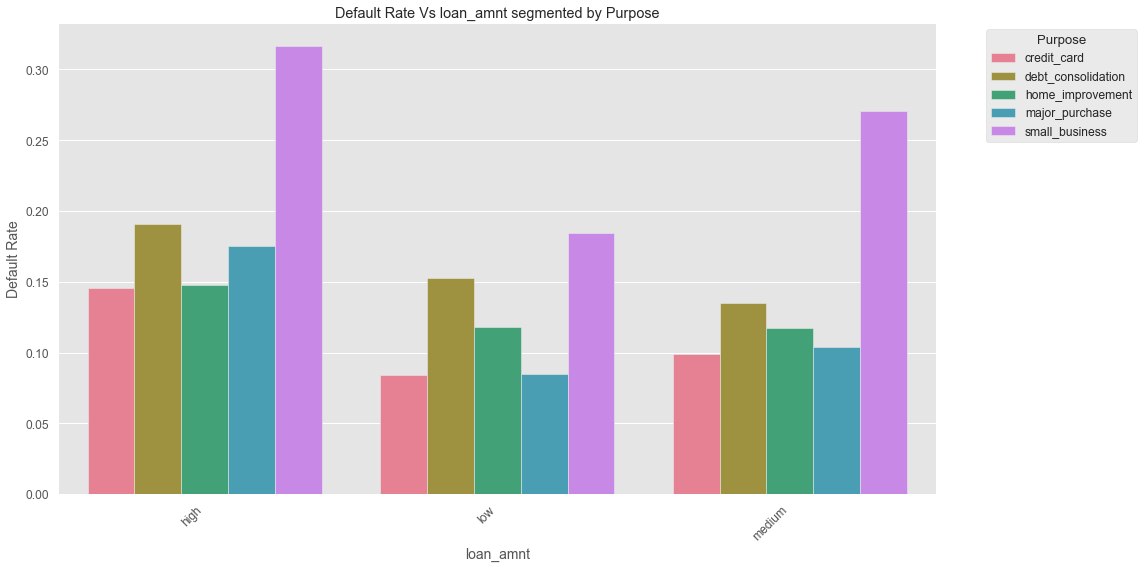

In [114]:
# barplot between default_rate and loan_amnt, segmented by Purpose.
plot_segmented_cat_var('loan_amnt')

**Obeservation:**
> 1.Whether loan amount is low/medium/high **small_pusiness purpose loan has high default rate compared to other purpose**. <br>
> 2.We can see from low to high loan_amnt default rate is higher for all purpose, but same is not true for low>medium. So we **don't have definit insight** here to conclude higher the loan amount higher the default rate.

In [115]:
# binning of debt to income ratio (dti)
def dti_binning_func(dti_value):
    if dti_value <= 10:
        return 'low'
    elif dti_value > 10 and dti_value <=20:
        return 'medium'
    else:
        return 'high'
    
#Applying above function to debt to income ratio (dti)
seg_loan_df['dti'] = seg_loan_df['dti'].apply(lambda x: dti_binning_func(x))

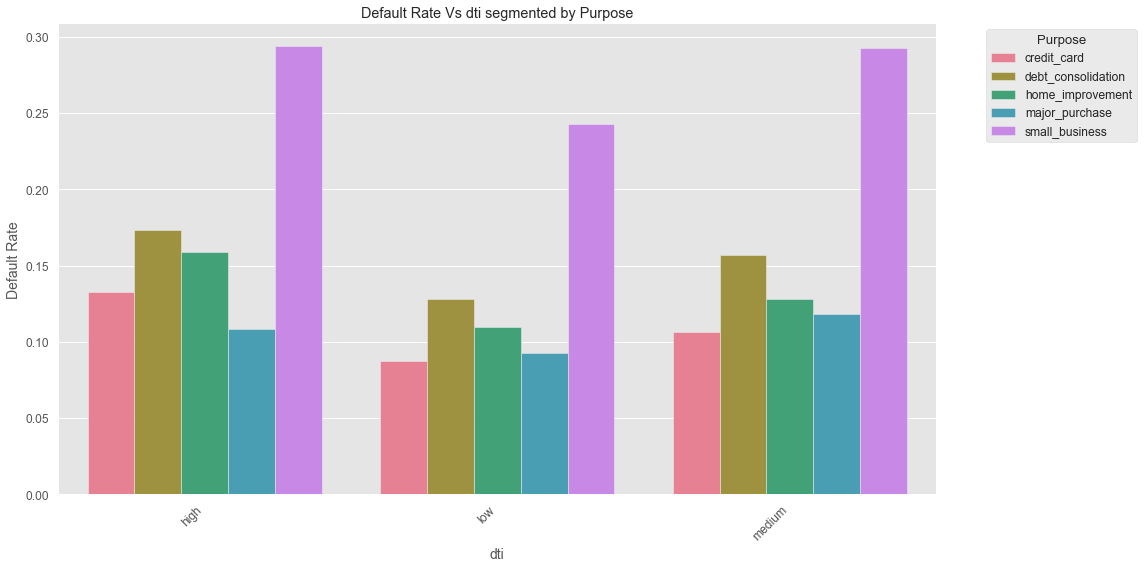

In [116]:
# barplot between default_rate and loan_amnt, segmented by Purpose.

plot_segmented_cat_var('dti')

**Observation:**
> 1.small_business purpose loan has high default rate across dti category. <br>
> 2.We have same trend across across purpose, nothing conclusive here.

In [117]:
# creating bucket of annual income
def annual_income_binning_func(annual_income_value):
    if annual_income_value <= 50000:
        return 'low'
    elif annual_income_value > 50000 and annual_income_value <=100000:
        return 'medium'
    else:
        return 'high'

 #Applying above function to annual_inc   
seg_loan_df['annual_inc'] = seg_loan_df['annual_inc'].apply(lambda x: annual_income_binning_func(x))

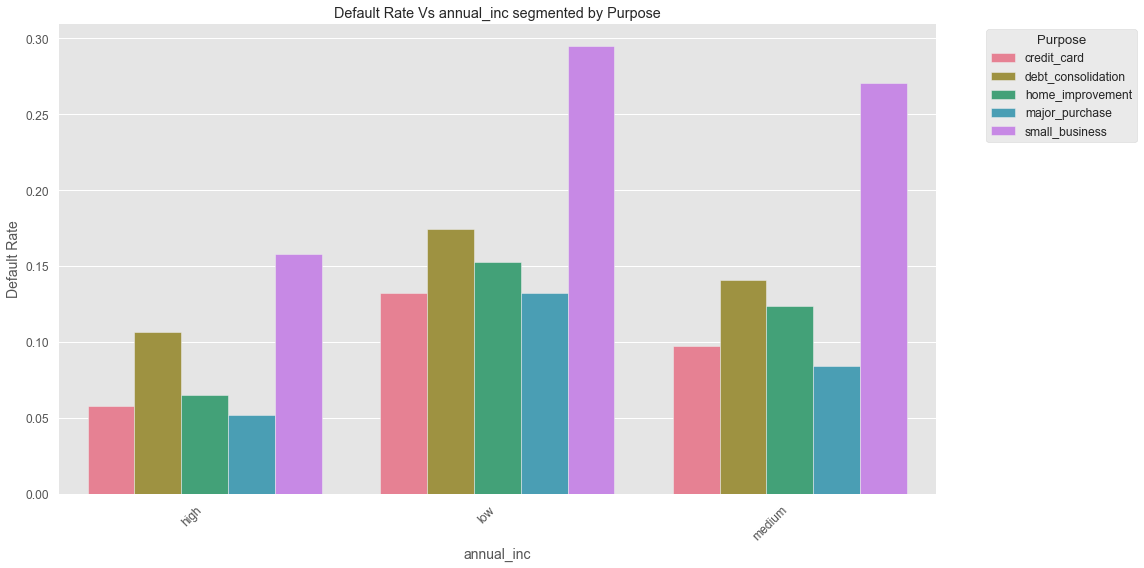

In [118]:
## barplot between default_rate and loan_amnt, segmented by Purpose.

plot_segmented_cat_var('annual_inc')

**Observations:**
> 1. Defalt rate trend of purpose is same across low/medium/high annual_income borrowers.
> 2. Default rate is decreasing as annual income is increasing , and this is for all purpose loan.

# <div style="background-color: lightblue; padding: 8px;">Multivariate Analysis</div>

> We will created a pair plot colored by loan status with a density plot of the diagonal and format the scatter plots.



In [119]:
# We are making a copy of loan_df data frame for multivariate analysis by picking a few important columns from dataset separately.

loan_multivariate_df = loan_df[['loan_amnt', 'annual_inc', 'Year','int_rate','loan_status']].copy()
loan_multivariate_df.head(5)


,loan_amnt,annual_inc,Year,int_rate,loan_status
0,5000,24000.0,2011,10.65,Fully Paid
1,2500,30000.0,2011,15.27,Charged Off
2,2400,12252.0,2011,15.96,Fully Paid
3,10000,49200.0,2011,13.49,Fully Paid
5,5000,36000.0,2011,7.90,Fully Paid


In [120]:
# As we have noticied during univariate analysis, thise attributes are highly slewed.
# So, we take the log of below variables

loan_multivariate_df['loan_amnt'] = np.log10(loan_multivariate_df['loan_amnt'])
loan_multivariate_df['annual_inc'] = np.log10(loan_multivariate_df['annual_inc'])
loan_multivariate_df['int_rate'] = np.log10(loan_multivariate_df['int_rate'])

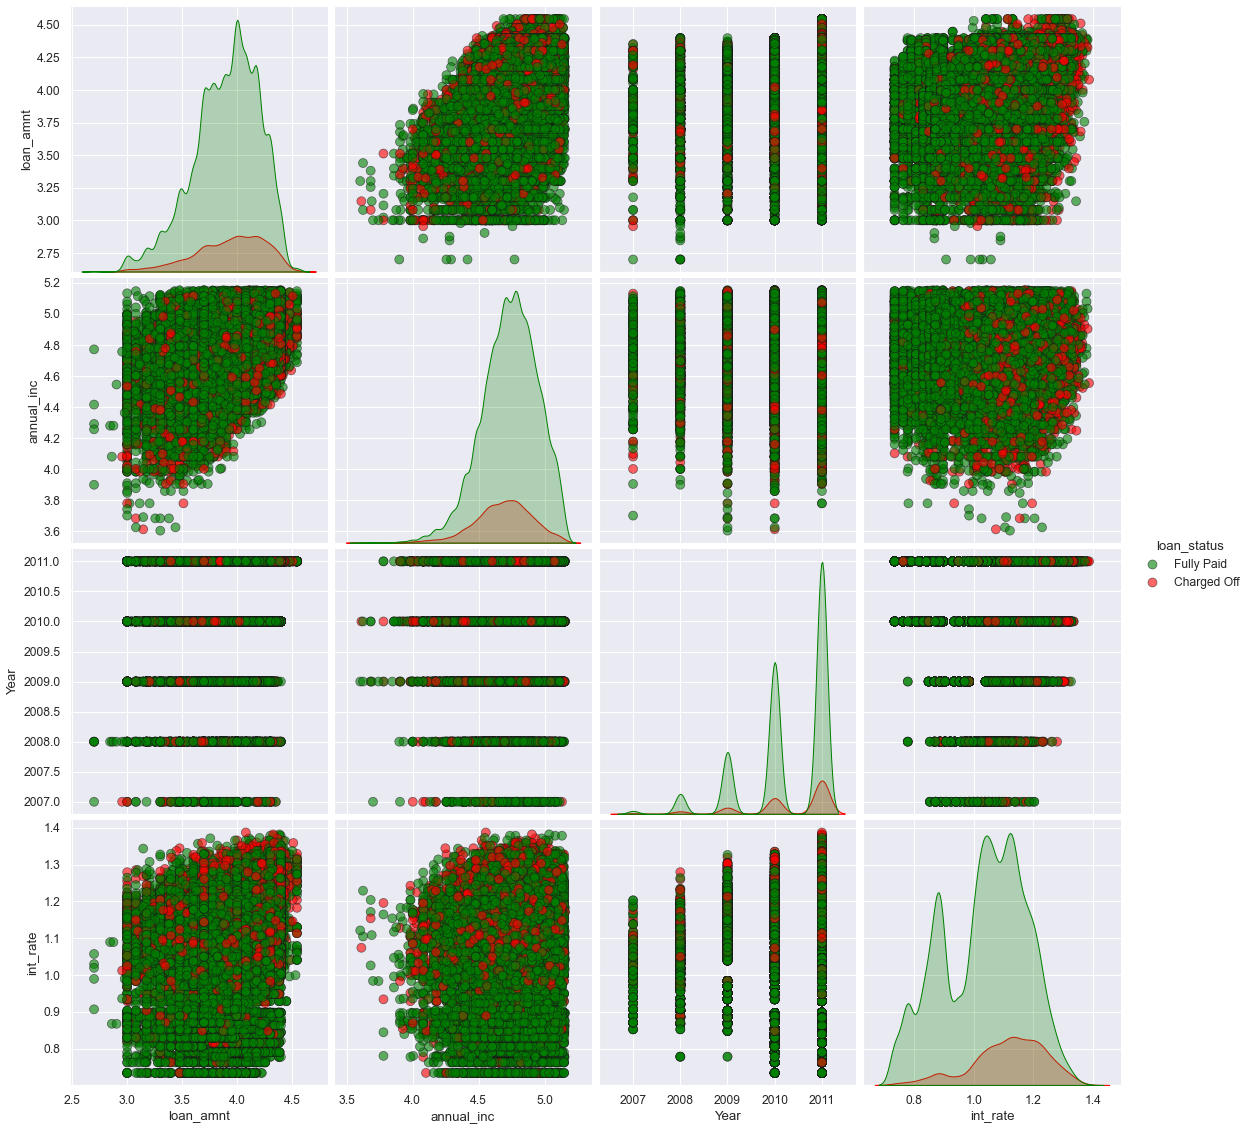

In [121]:
# Define a custom color palette
custom_palette = {'Fully Paid': 'green', 'Charged Off': 'red'} 

#Plot pairplot colored by loan status with a density plot of the diagonal and format the scatter plots.
sns.pairplot(loan_multivariate_df, 
             hue = 'loan_status', 
             diag_kind = 'kde', 
             palette = custom_palette,
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)
plt.show()

**Observations:**
> 1. Higher the loan amount, higher is the annual income.   <br>
> 2. Higher the annual income, high is the loan amount <br>
> 3. Higher the interest rate, higher is the chargedOff count <br>
> 4. Yearly, there is increase in total number of loans taken. <br>


 [Go to Top](#Lending-Club-Case-Study)